##**Supervised vs. Unsupervised Learning**
The goal of this project is to compare supervised learning to unsupervised learning. We will do this by focusing on dimension reduction methods (PCA, K-Best feature selection and Locally Linear Embeddor). After that we will compare dimension reduction to undersampling, this will be done by comparing the previous methods to a method that attempts to even the classes. The final method will be to compare supervised and unsupervised learning by combining PCA and undersampling. We expect that supervised learning will outperform unsupervised learning.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import time

import scipy
from scipy.stats import multivariate_normal
import scipy.linalg
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier

from sklearn.neighbors import KernelDensity
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.ensemble import IsolationForest

from sklearn.decomposition import PCA as PC
from sklearn.cluster import FeatureAgglomeration
from sklearn.cluster import MiniBatchKMeans

from sklearn.manifold import LocallyLinearEmbedding

In [ ]:
# Reads the dataset
data = pd.read_csv('data.csv')

# Creates a test set used when evening the data
test_class = data['Bankrupt?'].to_numpy()
test = data.drop(columns = 'Bankrupt?').to_numpy()

# Creates a list of headers for LASSO feature selection
headers = []
for col in data:
  headers.append(col)

# Initializes the Predictors and Response
Y = data['Bankrupt?'].to_numpy()
X = data.drop(columns = 'Bankrupt?').to_numpy()

datapoints = X.shape[0]
features = X.shape[1]

# Splits the predictors and response into testing and training sets
(trainX, testX, trainY, testY) = train_test_split(X, Y, test_size=0.2, random_state=1)

##**Supervised Learning**
In the supervised learning portion of the project we will test five different classification models (Logistic Regression, K Nearest Neighbors, Linear Discriminant Analysis, Quadratic Discriminant Analysis, and Decision Tree). All of these models perform terribly because the true businesses that went bankrupt are shrouded by the amount of businesses that are not bankrupt. This makes the differentiation between bankruptcy and solvency extremely difficult for these models. Our best model is LDA followed by a decision tree, the main metric used to determine the supervised models success is PR AUC. PR AUC is a commonly used metric when dealing with heavily imbalanced data. Most of our models do a better job classifying solvent companies rather than bankrupt companies and this can mainly be attributed to the imbalance of solvent companies making it difficult to predict bankrupt companies.


Classification Report for Training:

               precision    recall  f1-score   support

           0       0.97      1.00      0.98      5285
           1       0.75      0.02      0.03       170

    accuracy                           0.97      5455
   macro avg       0.86      0.51      0.51      5455
weighted avg       0.96      0.97      0.95      5455


Confusion Matrix:



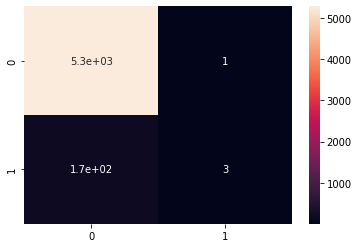

Training ROC AUC:  0.5087289220323891
Training Score:  0.9692025664527956
Training PR AUC:  0.05710609017944293



Classification Report for Testing:

               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1314
           1       0.00      0.00      0.00        50

    accuracy                           0.96      1364
   macro avg       0.48      0.50      0.49      1364
weighted avg       0.93      0.96      0.94      1364


Confusion Matrix:



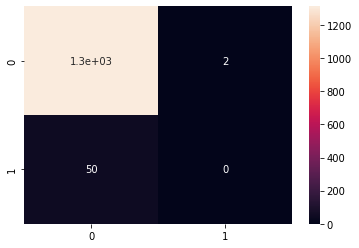

Testing ROC AUC:  0.4992389649923896
Testing Score:  0.9618768328445748
Training PR AUC:  0.046156480472378726
Finished in 1.9319918155670166 seconds


In [ ]:
# Initializes the Logistic Regression classification model
model = LogisticRegression(max_iter = 10000)

# Records the start time
start = time.time()

# Fits the model to the data
model.fit(trainX,trainY)

# Predicts for the training set
trainpredictions = model.predict(trainX)

# Predicts for the testing set
predictedY = model.predict(testX)

# Records the stopping time
end = time.time()

# Prints the quality metrics for the training set
print('\nClassification Report for Training:\n\n', classification_report(trainY, trainpredictions))
print('\nConfusion Matrix:\n')
ax = sn.heatmap(confusion_matrix(trainY, trainpredictions), annot = True)
plt.show(ax)
roctrain = roc_auc_score(trainY,trainpredictions)
score_train = model.score(trainX,trainY)
y_score = model.predict_proba(trainX)[:,1]
average_precision = average_precision_score(trainY, y_score)
print('Training ROC AUC: ', roctrain)
print('Training Score: ', score_train)
print('Training PR AUC: ', average_precision)
print('\n')

# Prints the quality metrics for the testing set
print('\nClassification Report for Testing:\n\n', classification_report(testY, predictedY))
print('\nConfusion Matrix:\n')
ax = sn.heatmap(confusion_matrix(testY, predictedY), annot = True)
plt.show(ax)
roctest = roc_auc_score(testY,predictedY)
score_test = model.score(testX,testY)
y_score = model.predict_proba(testX)[:,1]
average_precision = average_precision_score(testY, y_score)
print('Testing ROC AUC: ', roctest)
print('Testing Score: ', score_test)
print('Training PR AUC: ', average_precision)

# Prints the runtime
print('Finished in', end - start, 'seconds')


Classification Report for Training:

               precision    recall  f1-score   support

           0       0.97      1.00      0.99      5285
           1       0.92      0.06      0.12       170

    accuracy                           0.97      5455
   macro avg       0.94      0.53      0.55      5455
weighted avg       0.97      0.97      0.96      5455


Confusion Matrix:



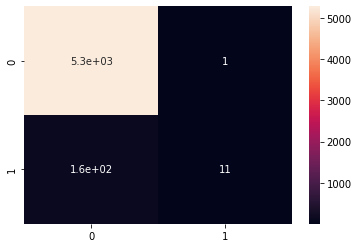

Training ROC AUC:  0.532258333797095
Training Score:  0.9706691109074244
Training PR AUC:  0.33217291879530964



Classification Report for Testing:

               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1314
           1       0.33      0.02      0.04        50

    accuracy                           0.96      1364
   macro avg       0.65      0.51      0.51      1364
weighted avg       0.94      0.96      0.95      1364


Confusion Matrix:



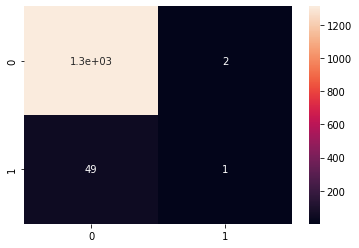

Testing ROC AUC:  0.5092389649923896
Testing Score:  0.9626099706744868
Training PR AUC:  0.05864649298029383
Finished in 1.822305679321289 seconds


In [ ]:
# Initializes the K Nearest Neighbors classification model
model = KNeighborsClassifier()

# Records the start time
start = time.time()

# Fits the model to the data
model.fit(trainX,trainY)

# Predicts for the training set
trainpredictions = model.predict(trainX)

# Predicts for the testing set
predictedY = model.predict(testX)

# Records the stopping time
end = time.time()

# Prints the quality metrics for the training set
print('\nClassification Report for Training:\n\n', classification_report(trainY, trainpredictions))
print('\nConfusion Matrix:\n')
ax = sn.heatmap(confusion_matrix(trainY, trainpredictions), annot = True)
plt.show(ax)
roctrain = roc_auc_score(trainY,trainpredictions)
score_train = model.score(trainX,trainY)
y_score = model.predict_proba(trainX)[:,1]
average_precision = average_precision_score(trainY, y_score)
print('Training ROC AUC: ', roctrain)
print('Training Score: ', score_train)
print('Training PR AUC: ', average_precision)
print('\n')

# Prints the quality metrics for the testing set
print('\nClassification Report for Testing:\n\n', classification_report(testY, predictedY))
print('\nConfusion Matrix:\n')
ax = sn.heatmap(confusion_matrix(testY, predictedY), annot = True)
plt.show(ax)
roctest = roc_auc_score(testY,predictedY)
score_test = model.score(testX,testY)
y_score = model.predict_proba(testX)[:,1]
average_precision = average_precision_score(testY, y_score)
print('Testing ROC AUC: ', roctest)
print('Testing Score: ', score_test)
print('Training PR AUC: ', average_precision)

# Prints the runtime
print('Finished in', end - start, 'seconds')


Classification Report for Training:

               precision    recall  f1-score   support

           0       0.98      0.99      0.98      5285
           1       0.48      0.36      0.41       170

    accuracy                           0.97      5455
   macro avg       0.73      0.67      0.70      5455
weighted avg       0.96      0.97      0.97      5455


Confusion Matrix:



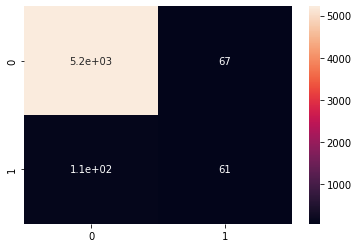

Training ROC AUC:  0.6730730702877179
Training Score:  0.9677360219981668
Training PR AUC:  0.4446867331074345



Classification Report for Testing:

               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1314
           1       0.43      0.24      0.31        50

    accuracy                           0.96      1364
   macro avg       0.70      0.61      0.64      1364
weighted avg       0.95      0.96      0.95      1364


Confusion Matrix:



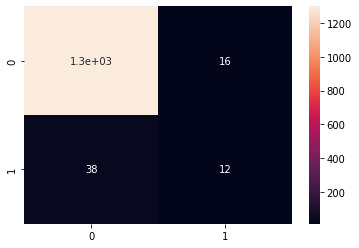

Testing ROC AUC:  0.6139117199391172
Testing Score:  0.9604105571847508
Training PR AUC:  0.317178569664702
Finished in 0.2736332416534424 seconds


In [ ]:
# Initializes the Linear Discriminant Analysis classification model
model = LinearDiscriminantAnalysis()

# Records the start time
start = time.time()

# Fits the model to the data
model.fit(trainX,trainY)

# Predicts for the training set
trainpredictions = model.predict(trainX)

# Predicts for the testing set
predictedY = model.predict(testX)

# Records the stopping time
end = time.time()

# Prints the quality metrics for the training set
print('\nClassification Report for Training:\n\n', classification_report(trainY, trainpredictions))
print('\nConfusion Matrix:\n')
ax = sn.heatmap(confusion_matrix(trainY, trainpredictions), annot = True)
plt.show(ax)
roctrain = roc_auc_score(trainY,trainpredictions)
score_train = model.score(trainX,trainY)
y_score = model.predict_proba(trainX)[:,1]
average_precision = average_precision_score(trainY, y_score)
print('Training ROC AUC: ', roctrain)
print('Training Score: ', score_train)
print('Training PR AUC: ', average_precision)
print('\n')

# Prints the quality metrics for the testing set
print('\nClassification Report for Testing:\n\n', classification_report(testY, predictedY))
print('\nConfusion Matrix:\n')
ax = sn.heatmap(confusion_matrix(testY, predictedY), annot = True)
plt.show(ax)
roctest = roc_auc_score(testY,predictedY)
score_test = model.score(testX,testY)
y_score = model.predict_proba(testX)[:,1]
average_precision = average_precision_score(testY, y_score)
print('Testing ROC AUC: ', roctest)
print('Testing Score: ', score_test)
print('Training PR AUC: ', average_precision)

# Prints the runtime
print('Finished in', end - start, 'seconds')

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")



Classification Report for Training:

               precision    recall  f1-score   support

           0       1.00      0.42      0.59      5285
           1       0.05      1.00      0.10       170

    accuracy                           0.43      5455
   macro avg       0.53      0.71      0.34      5455
weighted avg       0.97      0.43      0.57      5455


Confusion Matrix:



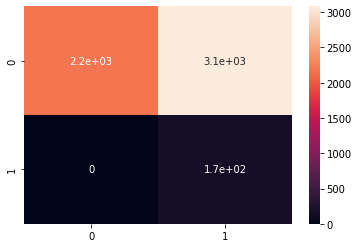

Training ROC AUC:  0.708325449385052
Training Score:  0.43483043079743355
Training PR AUC:  0.057882192713653385



Classification Report for Testing:

               precision    recall  f1-score   support

           0       0.98      0.43      0.60      1314
           1       0.05      0.78      0.09        50

    accuracy                           0.45      1364
   macro avg       0.52      0.61      0.35      1364
weighted avg       0.95      0.45      0.58      1364


Confusion Matrix:



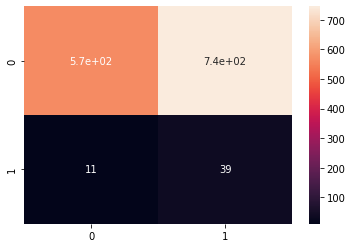

Testing ROC AUC:  0.6065144596651446
Testing Score:  0.44574780058651026
Training PR AUC:  0.05047939435655476
Finished in 0.16901063919067383 seconds


In [ ]:
# Initializes the Quadratic Discriminant Analysis classification model
model = QuadraticDiscriminantAnalysis()

# Records the start time
start = time.time()

# Fits the model to the data
model.fit(trainX,trainY)

# Predicts for the training set
trainpredictions = model.predict(trainX)

# Predicts for the testing set
predictedY = model.predict(testX)

# Records the stopping time
end = time.time()

# Prints the quality metrics for the training set
print('\nClassification Report for Training:\n\n', classification_report(trainY, trainpredictions))
print('\nConfusion Matrix:\n')
ax = sn.heatmap(confusion_matrix(trainY, trainpredictions), annot = True)
plt.show(ax)
roctrain = roc_auc_score(trainY,trainpredictions)
score_train = model.score(trainX,trainY)
y_score = model.predict_proba(trainX)[:,1]
average_precision = average_precision_score(trainY, y_score)
print('Training ROC AUC: ', roctrain)
print('Training Score: ', score_train)
print('Training PR AUC: ', average_precision)
print('\n')

# Prints the quality metrics for the testing set
print('\nClassification Report for Testing:\n\n', classification_report(testY, predictedY))
print('\nConfusion Matrix:\n')
ax = sn.heatmap(confusion_matrix(testY, predictedY), annot = True)
plt.show(ax)
roctest = roc_auc_score(testY,predictedY)
score_test = model.score(testX,testY)
y_score = model.predict_proba(testX)[:,1]
average_precision = average_precision_score(testY, y_score)
print('Testing ROC AUC: ', roctest)
print('Testing Score: ', score_test)
print('Training PR AUC: ', average_precision)

# Prints the runtime
print('Finished in', end - start, 'seconds')


Classification Report for Training:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5285
           1       1.00      1.00      1.00       170

    accuracy                           1.00      5455
   macro avg       1.00      1.00      1.00      5455
weighted avg       1.00      1.00      1.00      5455


Confusion Matrix:



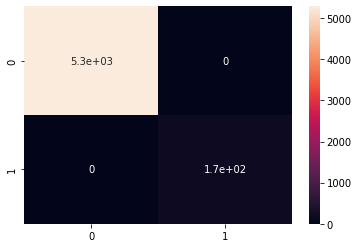

Training ROC AUC:  1.0
Training Score:  1.0
Training PR AUC:  1.0



Classification Report for Testing:

               precision    recall  f1-score   support

           0       0.97      0.98      0.98      1314
           1       0.35      0.34      0.34        50

    accuracy                           0.95      1364
   macro avg       0.66      0.66      0.66      1364
weighted avg       0.95      0.95      0.95      1364


Confusion Matrix:



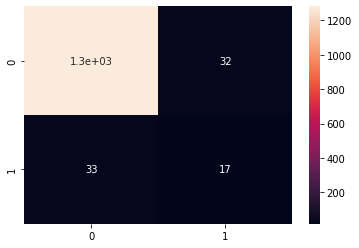

Testing ROC AUC:  0.6578234398782344
Testing Score:  0.9523460410557185
Training PR AUC:  0.14215273206056617
Finished in 1.7600414752960205 seconds


In [ ]:
# Initializes the Decision Tree classification model
model = DecisionTreeClassifier()

# Records the start time
start = time.time()

# Fits the model to the data
model.fit(trainX,trainY)

# Predicts for the training set
trainpredictions = model.predict(trainX)

# Predicts for the testing set
predictedY = model.predict(testX)

# Records the stopping time
end = time.time()

# Prints the quality metrics for the training set
print('\nClassification Report for Training:\n\n', classification_report(trainY, trainpredictions))
print('\nConfusion Matrix:\n')
ax = sn.heatmap(confusion_matrix(trainY, trainpredictions), annot = True)
plt.show(ax)
roctrain = roc_auc_score(trainY,trainpredictions)
score_train = model.score(trainX,trainY)
y_score = model.predict_proba(trainX)[:,1]
average_precision = average_precision_score(trainY, y_score)
print('Training ROC AUC: ', roctrain)
print('Training Score: ', score_train)
print('Training PR AUC: ', average_precision)
print('\n')

# Prints the quality metrics for the testing set
print('\nClassification Report for Testing:\n\n', classification_report(testY, predictedY))
print('\nConfusion Matrix:\n')
ax = sn.heatmap(confusion_matrix(testY, predictedY), annot = True)
plt.show(ax)
roctest = roc_auc_score(testY,predictedY)
score_test = model.score(testX,testY)
y_score = model.predict_proba(testX)[:,1]
average_precision = average_precision_score(testY, y_score)
print('Testing ROC AUC: ', roctest)
print('Testing Score: ', score_test)
print('Training PR AUC: ', average_precision)

# Prints the runtime
print('Finished in', end - start, 'seconds')

##**Unsupervised Learning**
In the unsupervised learning portion we used three different models (Feature Agglomeration, Kmeans, and Mini Batch Kmeans). The best model was Mini Batch Kmeans, this model has the highest number of correctly classified cases compared to the other two models. The drawback with using accuracy as the main metric is that if the classes are heavily unbalanced then the accuracy will be skewed towards the class with more data points. To adhere to this issue we decided to generate a confusion matrix and directly compare the success in each category. As a result we see that Kmeans does the best job classifying bankrupt companies while taking a major hit to the number of correctly classified solvent companies, on the other hand, Mini Batch Kmeans does not have this issue and primarily sees issues in classifying bankrupt companies.

Accuracy = 0.6962897785599061


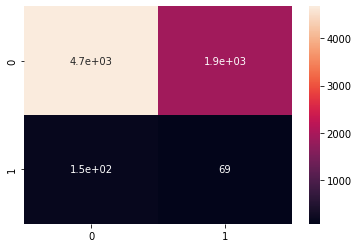

In [ ]:
#Initialize and fit FeatureAgglomeration model
model = FeatureAgglomeration(n_clusters=2)
fa = model.fit(X.T)

total = len(Y)
tp = fp = tn = fn = 0

#Calculate true and false positives and negatives
for i in range(len(fa.labels_)):
  if fa.labels_[i] == 0:
    if fa.labels_[i] != Y[i]:
      fn += 1
    else:
      tn += 1
  else:
    if fa.labels_[i] != Y[i]:
      fp += 1
    else:
      tp += 1

#Calculate Accuracy Score
print("Accuracy =", (tn+tp)/float(total))

#Generate Confusion Matrix
cf_matrix = [[tn, fp],[fn, tp]]
sn.heatmap(cf_matrix, annot = True)


Classification Report:

               precision    recall  f1-score   support

           0       0.96      0.30      0.46      6599
           1       0.03      0.62      0.05       220

    accuracy                           0.31      6819
   macro avg       0.49      0.46      0.26      6819
weighted avg       0.93      0.31      0.44      6819


Confusion Matrix:



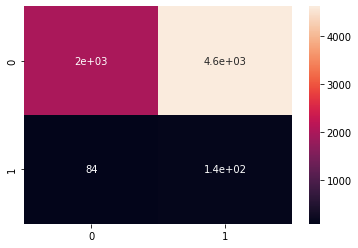

Training ROC AUC:  0.45918940886360193
Training Score:  -4.006303901260008e+23


Finished in 0.9400157928466797 seconds


In [ ]:
# Initializes the KMeans Clustering class
model = KMeans(n_clusters=2, random_state = 4)

# Records the start time
start = time.time()

# Fits the model to the training data
model.fit(X)

# Predicts using training data
predictions = model.predict(X)

# Records the end time
end = time.time()

# Prints the quality metrics
print('\nClassification Report:\n\n', classification_report(Y, predictions))
print('\nConfusion Matrix:\n')
ax = sn.heatmap(confusion_matrix(Y, predictions), annot = True)
plt.show(ax)
roctrain = roc_auc_score(Y,predictions)
score_train = model.score(X,Y)
print('Training ROC AUC: ', roctrain)
print('Training Score: ', score_train)
print('\n')
print('Finished in', end - start, 'seconds')


Classification Report:

               precision    recall  f1-score   support

           0       0.97      0.74      0.84      6599
           1       0.04      0.33      0.07       220

    accuracy                           0.72      6819
   macro avg       0.51      0.53      0.45      6819
weighted avg       0.94      0.72      0.81      6819


Confusion Matrix:



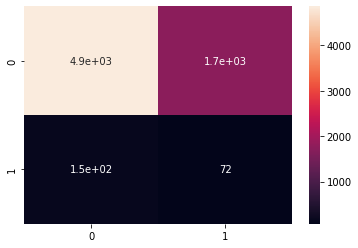

Training ROC AUC:  0.5314193610602157
Training Score:  -4.0782285622624956e+23


Finished in 0.22471833229064941 seconds


In [ ]:
# Initializes the MiniBatchKMeans Clustering class
model = MiniBatchKMeans(n_clusters=2, random_state = 4)

# Records the start time
start = time.time()

# Fits the model to the training data
model.fit(X)

# Predicts using training data
predictions = model.predict(X)

# Records the end time
end = time.time()

# Prints the quality metrics
print('\nClassification Report:\n\n', classification_report(Y, predictions))
print('\nConfusion Matrix:\n')
ax = sn.heatmap(confusion_matrix(Y, predictions), annot = True)
plt.show(ax)
roctrain = roc_auc_score(Y,predictions)
score_train = model.score(X,Y)
print('Training ROC AUC: ', roctrain)
print('Training Score: ', score_train)
print('\n')
print('Finished in', end - start, 'seconds')

##**PCA Supervised**
Due to the large amount of features, it seemed appropriate to consider reducing the dimensions and potentially remove some of the clustering between bankrupt and solvent companies. By retaining 90% of the variance we were able to decrease the dimensions down to seven dimensions. We decided to chose 90% variance retention because we were trying to find a reduced representation that spread the two classes farthest apart and 90% happened to be the best outcome. Our top performing model was Logistic Regression and PCA allowed an increase of 15% accuracy and 2% PR AUC. These results are not extremely significant and the PCA actually reduces the effectiveness for other models we tested. To conclude, PCA shows us that most of the features within the data set did not attribute much to determining bankruptcy. This makes sense because the primary purpose of PCA is to reduce dimensions to decrease computational time while retaining the essence of the data.

In [ ]:
def PCA(Xtrain, alpha):        
    # find the original dimension and print it
    dimension = Xtrain.shape[1]
    print('The original dimension of the data is', dimension)
    
    # center D to have mean 0
    Xtrain -= np.mean(Xtrain, axis=0)
    
    # compute the covariance matrix
    Sigma = (1/Xtrain.shape[0]) * Xtrain.T @ Xtrain

    # compute the eigenvalues and eigenvectors of D^T D
    (eValues, eVectors) = np.linalg.eigh(Sigma)

    # compute the total variance
    varX = np.sum(eValues)
    
    # initialize the variance for A to 0
    varA = 0.0
    
    # reverse eValues and eVectors
    eValues = np.flip(eValues)
    eVectors = np.flip(eVectors, axis=1)

    # find the minimum dimension consisting of fraction at least alpha of the total variance
    for r in np.arange(0, eValues.shape[0]):
        varA += eValues[r]
        ratio = varA/varX

        if ratio > alpha:
            dimension = r + 1
            print('The new dimension of the data is', dimension, 'and it explains', ratio, 'of the variance')
            break
            
    # construct the new basis
    basis = eVectors[:,:dimension]
    
    # create the datapoints in the new space
    A = Xtrain @ basis
    
    # return points
    return A

In [ ]:
import time
start = time.time()

# Apply PCA to the data matrices and retained 95 % of the variation so that 2 variables we left
PCA_x = PCA(X,0.9)


end = time.time()

print('PCA finished in', end - start, 'seconds')

(train_PCA, test_PCA, trainY, testY) = train_test_split(PCA_x, Y, test_size=0.2, random_state=1)

The original dimension of the data is 95
The new dimension of the data is 7 and it explains 0.9103576803520891 of the variance
PCA finished in 0.05034065246582031 seconds



Classification Report for Training:

               precision    recall  f1-score   support

           0       0.98      0.63      0.77      5285
           1       0.05      0.59      0.09       170

    accuracy                           0.63      5455
   macro avg       0.51      0.61      0.43      5455
weighted avg       0.95      0.63      0.74      5455


Confusion Matrix:



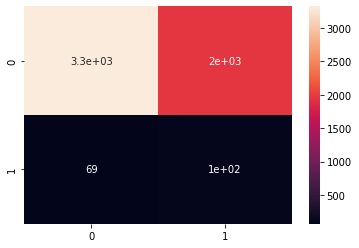

Training ROC AUC:  0.6114391451945017
Training Score:  0.6276810265811182
Training PR AUC:  0.05898453560710963



Classification Report for Testing:

               precision    recall  f1-score   support

           0       0.98      0.62      0.76      1314
           1       0.07      0.70      0.12        50

    accuracy                           0.62      1364
   macro avg       0.52      0.66      0.44      1364
weighted avg       0.95      0.62      0.74      1364


Confusion Matrix:



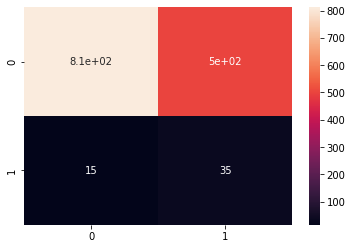

Testing ROC AUC:  0.6589802130898021
Testing Score:  0.6209677419354839
Training PR AUC:  0.0662147743475461
Finished in 0.038992881774902344 seconds


In [ ]:
# Initializes the Logistic Regression classification model
model = LogisticRegression(max_iter = 10000)

# Records the start time
start = time.time()

# Fits the model to the data
model.fit(train_PCA,trainY)

# Predicts for the training set
trainpredictions = model.predict(train_PCA)

# Predicts for the testing set
predictedY = model.predict(test_PCA)

# Records the stopping time
end = time.time()

# Prints the quality metrics for the training set
print('\nClassification Report for Training:\n\n', classification_report(trainY, trainpredictions))
print('\nConfusion Matrix:\n')
ax = sn.heatmap(confusion_matrix(trainY, trainpredictions), annot = True)
plt.show(ax)
roctrain = roc_auc_score(trainY,trainpredictions)
score_train = model.score(train_PCA,trainY)
y_score = model.predict_proba(train_PCA)[:,1]
average_precision = average_precision_score(trainY, y_score)
print('Training ROC AUC: ', roctrain)
print('Training Score: ', score_train)
print('Training PR AUC: ', average_precision)
print('\n')

# Prints the quality metrics for the testing set
print('\nClassification Report for Testing:\n\n', classification_report(testY, predictedY))
print('\nConfusion Matrix:\n')
ax = sn.heatmap(confusion_matrix(testY, predictedY), annot = True)
plt.show(ax)
roctest = roc_auc_score(testY,predictedY)
score_test = model.score(test_PCA,testY)
y_score = model.predict_proba(test_PCA)[:,1]
average_precision = average_precision_score(testY, y_score)
print('Testing ROC AUC: ', roctest)
print('Testing Score: ', score_test)
print('Training PR AUC: ', average_precision)

# Prints the runtime
print('Finished in', end - start, 'seconds')


Classification Report for Training:

               precision    recall  f1-score   support

           0       0.97      1.00      0.98      5285
           1       0.75      0.05      0.10       170

    accuracy                           0.97      5455
   macro avg       0.86      0.53      0.54      5455
weighted avg       0.96      0.97      0.96      5455


Confusion Matrix:



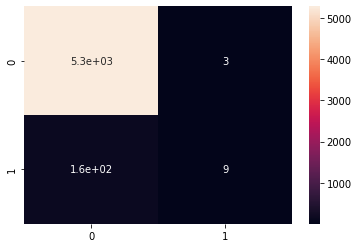

Training ROC AUC:  0.5261867660971673
Training Score:  0.96993583868011
Training PR AUC:  0.3116567134873163



Classification Report for Testing:

               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1314
           1       0.00      0.00      0.00        50

    accuracy                           0.96      1364
   macro avg       0.48      0.50      0.49      1364
weighted avg       0.93      0.96      0.94      1364


Confusion Matrix:



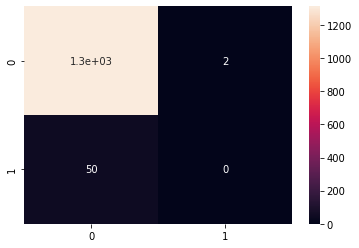

Testing ROC AUC:  0.4992389649923896
Testing Score:  0.9618768328445748
Training PR AUC:  0.05814302132044068
Finished in 0.4335155487060547 seconds


In [ ]:
# Initializes the K Nearest Neighbors classification model
model = KNeighborsClassifier()

# Records the start time
start = time.time()

# Fits the model to the data
model.fit(train_PCA,trainY)

# Predicts for the training set
trainpredictions = model.predict(train_PCA)

# Predicts for the testing set
predictedY = model.predict(test_PCA)

# Records the stopping time
end = time.time()

# Prints the quality metrics for the training set
print('\nClassification Report for Training:\n\n', classification_report(trainY, trainpredictions))
print('\nConfusion Matrix:\n')
ax = sn.heatmap(confusion_matrix(trainY, trainpredictions), annot = True)
plt.show(ax)
roctrain = roc_auc_score(trainY,trainpredictions)
score_train = model.score(train_PCA,trainY)
y_score = model.predict_proba(train_PCA)[:,1]
average_precision = average_precision_score(trainY, y_score)
print('Training ROC AUC: ', roctrain)
print('Training Score: ', score_train)
print('Training PR AUC: ', average_precision)
print('\n')

# Prints the quality metrics for the testing set
print('\nClassification Report for Testing:\n\n', classification_report(testY, predictedY))
print('\nConfusion Matrix:\n')
ax = sn.heatmap(confusion_matrix(testY, predictedY), annot = True)
plt.show(ax)
roctest = roc_auc_score(testY,predictedY)
score_test = model.score(test_PCA,testY)
y_score = model.predict_proba(test_PCA)[:,1]
average_precision = average_precision_score(testY, y_score)
print('Testing ROC AUC: ', roctest)
print('Testing Score: ', score_test)
print('Training PR AUC: ', average_precision)

# Prints the runtime
print('Finished in', end - start, 'seconds')


Classification Report for Training:

               precision    recall  f1-score   support

           0       0.97      1.00      0.98      5285
           1       0.00      0.00      0.00       170

    accuracy                           0.97      5455
   macro avg       0.48      0.50      0.49      5455
weighted avg       0.94      0.97      0.95      5455


Confusion Matrix:



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


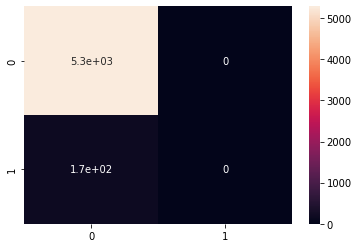

Training ROC AUC:  0.5
Training Score:  0.9688359303391384
Training PR AUC:  0.05882153444610965



Classification Report for Testing:

               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1314
           1       0.00      0.00      0.00        50

    accuracy                           0.96      1364
   macro avg       0.48      0.50      0.49      1364
weighted avg       0.93      0.96      0.95      1364


Confusion Matrix:



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


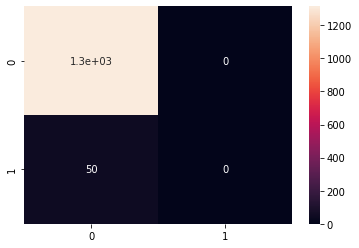

Testing ROC AUC:  0.5
Testing Score:  0.9633431085043989
Training PR AUC:  0.06416131853005055
Finished in 0.017538070678710938 seconds


In [ ]:
# Initializes the Linear Discriminant Analysis classification model
model = LinearDiscriminantAnalysis()

# Records the start time
start = time.time()

# Fits the model to the data
model.fit(train_PCA,trainY)

# Predicts for the training set
trainpredictions = model.predict(train_PCA)

# Predicts for the testing set
predictedY = model.predict(test_PCA)

# Records the stopping time
end = time.time()

# Prints the quality metrics for the training set
print('\nClassification Report for Training:\n\n', classification_report(trainY, trainpredictions))
print('\nConfusion Matrix:\n')
ax = sn.heatmap(confusion_matrix(trainY, trainpredictions), annot = True)
plt.show(ax)
roctrain = roc_auc_score(trainY,trainpredictions)
score_train = model.score(train_PCA,trainY)
y_score = model.predict_proba(train_PCA)[:,1]
average_precision = average_precision_score(trainY, y_score)
print('Training ROC AUC: ', roctrain)
print('Training Score: ', score_train)
print('Training PR AUC: ', average_precision)
print('\n')

# Prints the quality metrics for the testing set
print('\nClassification Report for Testing:\n\n', classification_report(testY, predictedY))
print('\nConfusion Matrix:\n')
ax = sn.heatmap(confusion_matrix(testY, predictedY), annot = True)
plt.show(ax)
roctest = roc_auc_score(testY,predictedY)
score_test = model.score(test_PCA,testY)
y_score = model.predict_proba(test_PCA)[:,1]
average_precision = average_precision_score(testY, y_score)
print('Testing ROC AUC: ', roctest)
print('Testing Score: ', score_test)
print('Training PR AUC: ', average_precision)

# Prints the runtime
print('Finished in', end - start, 'seconds')


Classification Report for Training:

               precision    recall  f1-score   support

           0       0.97      0.99      0.98      5285
           1       0.18      0.05      0.08       170

    accuracy                           0.96      5455
   macro avg       0.57      0.52      0.53      5455
weighted avg       0.95      0.96      0.95      5455


Confusion Matrix:



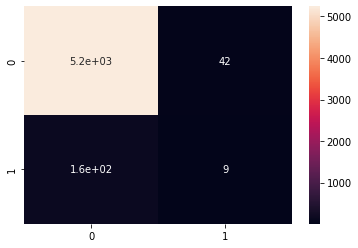

Training ROC AUC:  0.5224970783015193
Training Score:  0.9627864344637946
Training PR AUC:  0.08889926190130192



Classification Report for Testing:

               precision    recall  f1-score   support

           0       0.96      0.99      0.98      1314
           1       0.08      0.02      0.03        50

    accuracy                           0.96      1364
   macro avg       0.52      0.51      0.50      1364
weighted avg       0.93      0.96      0.94      1364


Confusion Matrix:



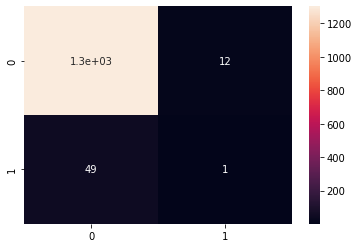

Testing ROC AUC:  0.505433789954338
Testing Score:  0.9552785923753666
Training PR AUC:  0.06527679760448592
Finished in 0.013661384582519531 seconds


In [ ]:
# Initializes the Quadratic Discriminant Analysis classification model
model = QuadraticDiscriminantAnalysis()

# Records the start time
start = time.time()

# Fits the model to the data
model.fit(train_PCA,trainY)

# Predicts for the training set
trainpredictions = model.predict(train_PCA)

# Predicts for the testing set
predictedY = model.predict(test_PCA)

# Records the stopping time
end = time.time()

# Prints the quality metrics for the training set
print('\nClassification Report for Training:\n\n', classification_report(trainY, trainpredictions))
print('\nConfusion Matrix:\n')
ax = sn.heatmap(confusion_matrix(trainY, trainpredictions), annot = True)
plt.show(ax)
roctrain = roc_auc_score(trainY,trainpredictions)
score_train = model.score(train_PCA,trainY)
y_score = model.predict_proba(train_PCA)[:,1]
average_precision = average_precision_score(trainY, y_score)
print('Training ROC AUC: ', roctrain)
print('Training Score: ', score_train)
print('Training PR AUC: ', average_precision)
print('\n')

# Prints the quality metrics for the testing set
print('\nClassification Report for Testing:\n\n', classification_report(testY, predictedY))
print('\nConfusion Matrix:\n')
ax = sn.heatmap(confusion_matrix(testY, predictedY), annot = True)
plt.show(ax)
roctest = roc_auc_score(testY,predictedY)
score_test = model.score(test_PCA,testY)
y_score = model.predict_proba(test_PCA)[:,1]
average_precision = average_precision_score(testY, y_score)
print('Testing ROC AUC: ', roctest)
print('Testing Score: ', score_test)
print('Training PR AUC: ', average_precision)

# Prints the runtime
print('Finished in', end - start, 'seconds')


Classification Report for Training:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5285
           1       1.00      1.00      1.00       170

    accuracy                           1.00      5455
   macro avg       1.00      1.00      1.00      5455
weighted avg       1.00      1.00      1.00      5455


Confusion Matrix:



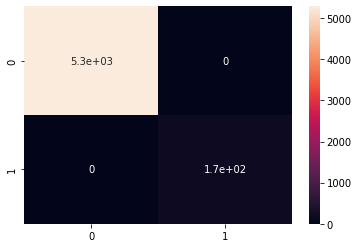

Training ROC AUC:  1.0
Training Score:  1.0
Training PR AUC:  1.0



Classification Report for Testing:

               precision    recall  f1-score   support

           0       0.96      0.97      0.97      1314
           1       0.07      0.06      0.06        50

    accuracy                           0.93      1364
   macro avg       0.52      0.51      0.51      1364
weighted avg       0.93      0.93      0.93      1364


Confusion Matrix:



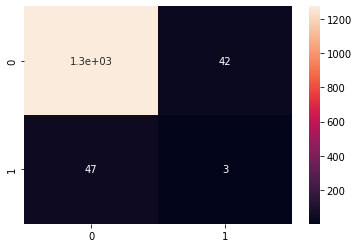

Testing ROC AUC:  0.5140182648401825
Testing Score:  0.9347507331378299
Training PR AUC:  0.0384574780058651
Finished in 0.09108924865722656 seconds


In [ ]:
# Initializes the Decision Tree classification model
model = DecisionTreeClassifier()

# Records the start time
start = time.time()

# Fits the model to the data
model.fit(train_PCA,trainY)

# Predicts for the training set
trainpredictions = model.predict(train_PCA)

# Predicts for the testing set
predictedY = model.predict(test_PCA)

# Records the stopping time
end = time.time()

# Prints the quality metrics for the training set
print('\nClassification Report for Training:\n\n', classification_report(trainY, trainpredictions))
print('\nConfusion Matrix:\n')
ax = sn.heatmap(confusion_matrix(trainY, trainpredictions), annot = True)
plt.show(ax)
roctrain = roc_auc_score(trainY,trainpredictions)
score_train = model.score(train_PCA,trainY)
y_score = model.predict_proba(train_PCA)[:,1]
average_precision = average_precision_score(trainY, y_score)
print('Training ROC AUC: ', roctrain)
print('Training Score: ', score_train)
print('Training PR AUC: ', average_precision)
print('\n')

# Prints the quality metrics for the testing set
print('\nClassification Report for Testing:\n\n', classification_report(testY, predictedY))
print('\nConfusion Matrix:\n')
ax = sn.heatmap(confusion_matrix(testY, predictedY), annot = True)
plt.show(ax)
roctest = roc_auc_score(testY,predictedY)
score_test = model.score(test_PCA,testY)
y_score = model.predict_proba(test_PCA)[:,1]
average_precision = average_precision_score(testY, y_score)
print('Testing ROC AUC: ', roctest)
print('Testing Score: ', score_test)
print('Training PR AUC: ', average_precision)

# Prints the runtime
print('Finished in', end - start, 'seconds')

##**PCA Unsupervised**
Performing PCA on unsupervised models resulted in an increase in accuracy for Feature Agglomeration but at the cost of decreasing the number of correctly classified bankrupt cases which is not ideal. PCA did not have much of an effect on Kmeans and Mini Batch Kmeans. By comparing confusion matrices, our results suggest that Mini Batch Kmeans outperforms the other two models. To conclude, it appears that PCA does a good job reducing dimensions while failing to pull apart the differences between the two classes.

In [ ]:
import time
start = time.time()

# Apply PCA to the data matrices and retained 95 % of the variation so that 2 variables we left
PCAx = PCA(X,0.9)


end = time.time()

print('PCA finished in', end - start, 'seconds')

The original dimension of the data is 95
The new dimension of the data is 7 and it explains 0.9103576803520891 of the variance
PCA finished in 0.06809401512145996 seconds


Accuracy =  0.7596421762721807


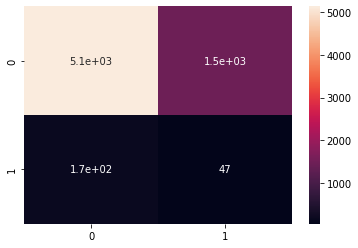

In [ ]:
#Initialize and fit FeatureAgglomeration model using PCA function
model = FeatureAgglomeration(n_clusters=2)
fa = model.fit(PCAx.T)

#x and y points list for plotting
xpoints = []
ypoints = []

#List for coloring points
paint = []
tp = fp = tn = fn = 0
total = len(Y)

#Calculate true and false positives and negatives and set colors for plotting
for i in range(len(fa.labels_)):
  if fa.labels_[i] == 0:
    if fa.labels_[i] != Y[i]:
      paint.append("#FF0066")
      fn += 1
    else:
      paint.append("#bbbbbb")
      tn += 1
  else:
    if fa.labels_[i] != Y[i]:
      paint.append("#FF0066")
      fp += 1
    else:
      paint.append("#bbbbbb")
      tp += 1

#Calculate Accuracy
print("Accuracy = ", (tp+tn)/float(total))

#Generate Confusion Matrix
cf_matrix = [[tn, fp],[fn, tp]]
sn.heatmap(cf_matrix, annot = True)


Classification Report:

               precision    recall  f1-score   support

           0       0.96      0.30      0.46      6599
           1       0.03      0.62      0.05       220

    accuracy                           0.31      6819
   macro avg       0.49      0.46      0.26      6819
weighted avg       0.93      0.31      0.45      6819


Confusion Matrix:



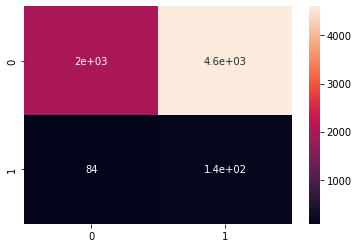

Training ROC AUC:  0.4601744065905302
Training Score:  -3.570836528857937e+23


Finished in 0.3678760528564453 seconds


In [ ]:
# Initializes the KMeans Clustering class
model = KMeans(n_clusters=2, random_state = 4)

# Records the start time
start = time.time()

# Fits the model to the training data
model.fit(PCAx)

# Predicts using training data
predictions = model.predict(PCAx)

# Records the end time
end = time.time()

# Prints the quality metrics
print('\nClassification Report:\n\n', classification_report(Y, predictions))
print('\nConfusion Matrix:\n')
ax = sn.heatmap(confusion_matrix(Y, predictions), annot = True)
plt.show(ax)
roctrain = roc_auc_score(Y,predictions)
score_train = model.score(PCAx,Y)
print('Training ROC AUC: ', roctrain)
print('Training Score: ', score_train)
print('\n')
print('Finished in', end - start, 'seconds')


Classification Report:

               precision    recall  f1-score   support

           0       0.97      0.70      0.81      6599
           1       0.04      0.39      0.07       220

    accuracy                           0.69      6819
   macro avg       0.51      0.54      0.44      6819
weighted avg       0.94      0.69      0.79      6819


Confusion Matrix:



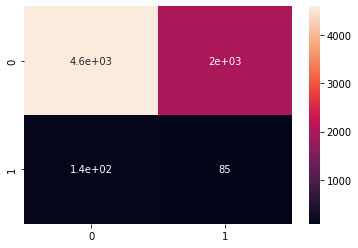

Training ROC AUC:  0.5417194754026091
Training Score:  -3.571359400258269e+23


Finished in 0.023798704147338867 seconds


In [ ]:
# Initializes the KMeans Clustering class
model = MiniBatchKMeans(n_clusters=2, random_state = 4)

# Records the start time
start = time.time()

# Fits the model to the training data
model.fit(PCAx)

# Predicts using training data
predictions = model.predict(PCAx)

# Records the end time
end = time.time()

# Prints the quality metrics
print('\nClassification Report:\n\n', classification_report(Y, predictions))
print('\nConfusion Matrix:\n')
ax = sn.heatmap(confusion_matrix(Y, predictions), annot = True)
plt.show(ax)
roctrain = roc_auc_score(Y,predictions)
score_train = model.score(PCAx,Y)
print('Training ROC AUC: ', roctrain)
print('Training Score: ', score_train)
print('\n')
print('Finished in', end - start, 'seconds')

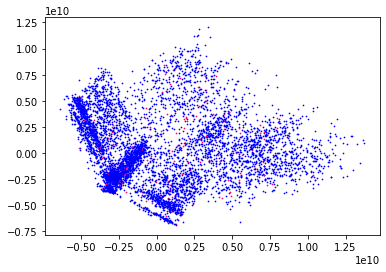

In [ ]:
#Use sklearn pca to condense data to 2 dimensions
pca = PC(n_components=2)
pcaX = pca.fit_transform(X)
xpoints = []
ypoints = []
paint = []
#Assign colors for bankruptcies and non-bankruptcies
for i in range(len(Y)):
  if Y[i] == 0:
    paint.append("#0000FF")
  else:
    paint.append("#FF0066")

#plot data
for i in range(len(pcaX)):
  plt.scatter(pcaX[i][0], pcaX[i][1], s = .5, color=paint[i])
plt.show()

Accuracy = 0.6848511511951899


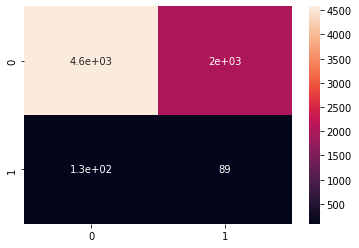

In [ ]:
#Initialize FeatureAgglomeration using pca 
model = FeatureAgglomeration(n_clusters=2)
fa = model.fit(pcaX.T)
xpoints = []
ypoints = []
paint = []
tp = fp = tn = fn = 0
total = len(Y)

#Set colors for plot and calculate true/false positives and negatives
for i in range(len(fa.labels_)):
  if fa.labels_[i] == 0:
    if fa.labels_[i] != Y[i]:
      paint.append("#FF0066")
      fn += 1
    else:
      paint.append("#bbbbbb")
      tn += 1
  else:
    if fa.labels_[i] != Y[i]:
      paint.append("#FF0066")
      fp += 1
    else:
      paint.append("#bbbbbb")
      tp += 1

#Calculate Accuracy
print("Accuracy =", (tn + tp)/float(total))

#Generate Confusion Matrix
cf_matrix = [[tn, fp],[fn, tp]]
sn.heatmap(cf_matrix, annot = True)

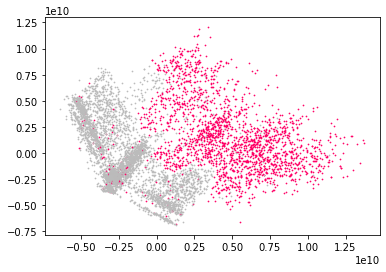

In [ ]:
#Plot data
for i in range(len(pcaX)):
  plt.scatter(pcaX[i][0], pcaX[i][1], s = .5, color=paint[i])
plt.show()

##**K-Best Supervised**
The next feature reduction method was K-Best, we decided to use a Chi Square scoring function and retain 15 features. We tested the number of features from 2-30. Overall none of these attempts did much to improve the results of the models, our best model was LDA while QDA did a really good job at predicting bankrupt companies. This is understandable because usually feature reduction is aimed to decrease computation time while retaining the essence of the data. To conclude, the accuracy outcome is heavily dependent on the score function and number of features and overall is not a very successful method for our dataset. By changing the score function the results are affected, but not enough to make much of a difference. This method would be more useful on other data where the classes do not have significant overlap.

In [ ]:
from sklearn.feature_selection import SelectKBest,chi2
K_x = X
K_y = Y
uni = SelectKBest(score_func = chi2, k = 30)
new = uni.fit_transform(K_x,K_y)

(K_train, K_test, trainY, testY) = train_test_split(new, K_y, test_size=0.2, random_state=1)


Classification Report for Training:

               precision    recall  f1-score   support

           0       0.97      1.00      0.98      5285
           1       0.75      0.02      0.03       170

    accuracy                           0.97      5455
   macro avg       0.86      0.51      0.51      5455
weighted avg       0.96      0.97      0.95      5455


Confusion Matrix:



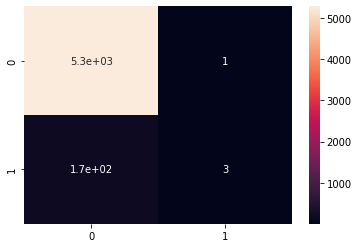

Training ROC AUC:  0.5087289220323891
Training Score:  0.9692025664527956
Training PR AUC:  0.0571078329006067



Classification Report for Testing:

               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1314
           1       0.00      0.00      0.00        50

    accuracy                           0.96      1364
   macro avg       0.48      0.50      0.49      1364
weighted avg       0.93      0.96      0.94      1364


Confusion Matrix:



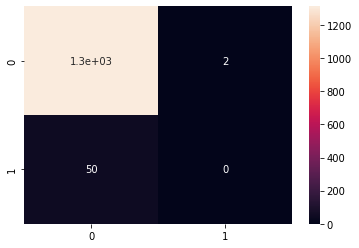

Testing ROC AUC:  0.4992389649923896
Testing Score:  0.9618768328445748
Training PR AUC:  0.046163478518637974
Finished in 0.5479378700256348 seconds


In [ ]:
# Initializes the Logistic Regression classification model
model = LogisticRegression(max_iter = 10000)

# Records the start time
start = time.time()

# Fits the model to the data
model.fit(K_train,trainY)

# Predicts for the training set
trainpredictions = model.predict(K_train)

# Predicts for the testing set
predictedY = model.predict(K_test)

# Records the stopping time
end = time.time()

# Prints the quality metrics for the training set
print('\nClassification Report for Training:\n\n', classification_report(trainY, trainpredictions))
print('\nConfusion Matrix:\n')
ax = sn.heatmap(confusion_matrix(trainY, trainpredictions), annot = True)
plt.show(ax)
roctrain = roc_auc_score(trainY,trainpredictions)
score_train = model.score(K_train,trainY)
y_score = model.predict_proba(K_train)[:,1]
average_precision = average_precision_score(trainY, y_score)
print('Training ROC AUC: ', roctrain)
print('Training Score: ', score_train)
print('Training PR AUC: ', average_precision)
print('\n')

# Prints the quality metrics for the testing set
print('\nClassification Report for Testing:\n\n', classification_report(testY, predictedY))
print('\nConfusion Matrix:\n')
ax = sn.heatmap(confusion_matrix(testY, predictedY), annot = True)
plt.show(ax)
roctest = roc_auc_score(testY,predictedY)
score_test = model.score(K_test,testY)
y_score = model.predict_proba(K_test)[:,1]
average_precision = average_precision_score(testY, y_score)
print('Testing ROC AUC: ', roctest)
print('Testing Score: ', score_test)
print('Training PR AUC: ', average_precision)

# Prints the runtime
print('Finished in', end - start, 'seconds')


Classification Report for Training:

               precision    recall  f1-score   support

           0       0.97      1.00      0.99      5285
           1       0.92      0.06      0.12       170

    accuracy                           0.97      5455
   macro avg       0.94      0.53      0.55      5455
weighted avg       0.97      0.97      0.96      5455


Confusion Matrix:



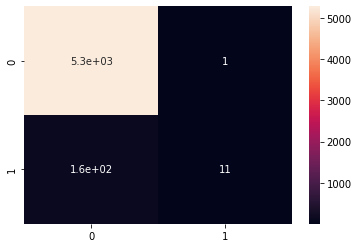

Training ROC AUC:  0.532258333797095
Training Score:  0.9706691109074244
Training PR AUC:  0.33217291879530964



Classification Report for Testing:

               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1314
           1       0.33      0.02      0.04        50

    accuracy                           0.96      1364
   macro avg       0.65      0.51      0.51      1364
weighted avg       0.94      0.96      0.95      1364


Confusion Matrix:



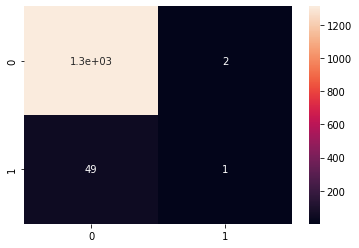

Testing ROC AUC:  0.5092389649923896
Testing Score:  0.9626099706744868
Training PR AUC:  0.05864649298029383
Finished in 1.038090467453003 seconds


In [ ]:
# Initializes the K Nearest Neighbors classification model
model = KNeighborsClassifier()

# Records the start time
start = time.time()

# Fits the model to the data
model.fit(K_train,trainY)

# Predicts for the training set
trainpredictions = model.predict(K_train)

# Predicts for the testing set
predictedY = model.predict(K_test)

# Records the stopping time
end = time.time()

# Prints the quality metrics for the training set
print('\nClassification Report for Training:\n\n', classification_report(trainY, trainpredictions))
print('\nConfusion Matrix:\n')
ax = sn.heatmap(confusion_matrix(trainY, trainpredictions), annot = True)
plt.show(ax)
roctrain = roc_auc_score(trainY,trainpredictions)
score_train = model.score(K_train,trainY)
y_score = model.predict_proba(K_train)[:,1]
average_precision = average_precision_score(trainY, y_score)
print('Training ROC AUC: ', roctrain)
print('Training Score: ', score_train)
print('Training PR AUC: ', average_precision)
print('\n')

# Prints the quality metrics for the testing set
print('\nClassification Report for Testing:\n\n', classification_report(testY, predictedY))
print('\nConfusion Matrix:\n')
ax = sn.heatmap(confusion_matrix(testY, predictedY), annot = True)
plt.show(ax)
roctest = roc_auc_score(testY,predictedY)
score_test = model.score(K_test,testY)
y_score = model.predict_proba(K_test)[:,1]
average_precision = average_precision_score(testY, y_score)
print('Testing ROC AUC: ', roctest)
print('Testing Score: ', score_test)
print('Training PR AUC: ', average_precision)

# Prints the runtime
print('Finished in', end - start, 'seconds')


Classification Report for Training:

               precision    recall  f1-score   support

           0       0.97      0.99      0.98      5285
           1       0.37      0.14      0.20       170

    accuracy                           0.97      5455
   macro avg       0.67      0.56      0.59      5455
weighted avg       0.95      0.97      0.96      5455


Confusion Matrix:



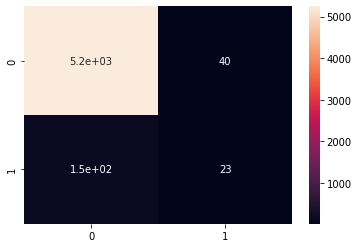

Training ROC AUC:  0.5638627636485057
Training Score:  0.9657195233730522
Training PR AUC:  0.27195419078472827



Classification Report for Testing:

               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1314
           1       0.25      0.08      0.12        50

    accuracy                           0.96      1364
   macro avg       0.61      0.54      0.55      1364
weighted avg       0.94      0.96      0.95      1364


Confusion Matrix:



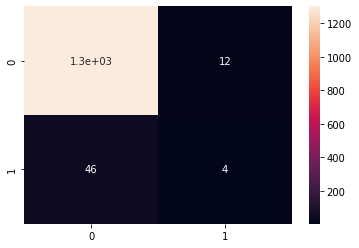

Testing ROC AUC:  0.5354337899543379
Testing Score:  0.9574780058651027
Training PR AUC:  0.21572121412549006
Finished in 0.034592390060424805 seconds


In [ ]:
# Initializes the Linear Discriminant Analysis classification model
model = LinearDiscriminantAnalysis()

# Records the start time
start = time.time()

# Fits the model to the data
model.fit(K_train,trainY)

# Predicts for the training set
trainpredictions = model.predict(K_train)

# Predicts for the testing set
predictedY = model.predict(K_test)

# Records the stopping time
end = time.time()

# Prints the quality metrics for the training set
print('\nClassification Report for Training:\n\n', classification_report(trainY, trainpredictions))
print('\nConfusion Matrix:\n')
ax = sn.heatmap(confusion_matrix(trainY, trainpredictions), annot = True)
plt.show(ax)
roctrain = roc_auc_score(trainY,trainpredictions)
score_train = model.score(K_train,trainY)
y_score = model.predict_proba(K_train)[:,1]
average_precision = average_precision_score(trainY, y_score)
print('Training ROC AUC: ', roctrain)
print('Training Score: ', score_train)
print('Training PR AUC: ', average_precision)
print('\n')

# Prints the quality metrics for the testing set
print('\nClassification Report for Testing:\n\n', classification_report(testY, predictedY))
print('\nConfusion Matrix:\n')
ax = sn.heatmap(confusion_matrix(testY, predictedY), annot = True)
plt.show(ax)
roctest = roc_auc_score(testY,predictedY)
score_test = model.score(K_test,testY)
y_score = model.predict_proba(K_test)[:,1]
average_precision = average_precision_score(testY, y_score)
print('Testing ROC AUC: ', roctest)
print('Testing Score: ', score_test)
print('Training PR AUC: ', average_precision)

# Prints the runtime
print('Finished in', end - start, 'seconds')


Classification Report for Training:

               precision    recall  f1-score   support

           0       1.00      0.08      0.15      5285
           1       0.03      1.00      0.07       170

    accuracy                           0.11      5455
   macro avg       0.52      0.54      0.11      5455
weighted avg       0.97      0.11      0.14      5455


Confusion Matrix:



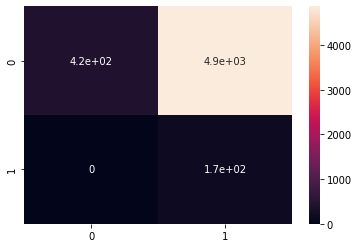

Training ROC AUC:  0.5394512771996216
Training Score:  0.10760769935838681
Training PR AUC:  0.034378159757330634



Classification Report for Testing:

               precision    recall  f1-score   support

           0       0.97      0.10      0.17      1314
           1       0.04      0.92      0.07        50

    accuracy                           0.13      1364
   macro avg       0.50      0.51      0.12      1364
weighted avg       0.94      0.13      0.17      1364


Confusion Matrix:



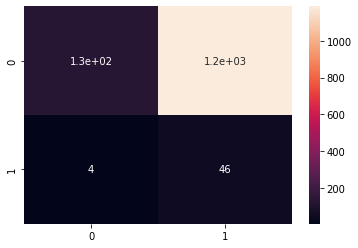

Testing ROC AUC:  0.5079452054794521
Testing Score:  0.12609970674486803
Training PR AUC:  0.03787411926288788
Finished in 0.0247955322265625 seconds


In [ ]:
# Initializes the Quadratic Discriminant Analysis classification model
model = QuadraticDiscriminantAnalysis()

# Records the start time
start = time.time()

# Fits the model to the data
model.fit(K_train,trainY)

# Predicts for the training set
trainpredictions = model.predict(K_train)

# Predicts for the testing set
predictedY = model.predict(K_test)

# Records the stopping time
end = time.time()

# Prints the quality metrics for the training set
print('\nClassification Report for Training:\n\n', classification_report(trainY, trainpredictions))
print('\nConfusion Matrix:\n')
ax = sn.heatmap(confusion_matrix(trainY, trainpredictions), annot = True)
plt.show(ax)
roctrain = roc_auc_score(trainY,trainpredictions)
score_train = model.score(K_train,trainY)
y_score = model.predict_proba(K_train)[:,1]
average_precision = average_precision_score(trainY, y_score)
print('Training ROC AUC: ', roctrain)
print('Training Score: ', score_train)
print('Training PR AUC: ', average_precision)
print('\n')

# Prints the quality metrics for the testing set
print('\nClassification Report for Testing:\n\n', classification_report(testY, predictedY))
print('\nConfusion Matrix:\n')
ax = sn.heatmap(confusion_matrix(testY, predictedY), annot = True)
plt.show(ax)
roctest = roc_auc_score(testY,predictedY)
score_test = model.score(K_test,testY)
y_score = model.predict_proba(K_test)[:,1]
average_precision = average_precision_score(testY, y_score)
print('Testing ROC AUC: ', roctest)
print('Testing Score: ', score_test)
print('Training PR AUC: ', average_precision)

# Prints the runtime
print('Finished in', end - start, 'seconds')


Classification Report for Training:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5285
           1       1.00      1.00      1.00       170

    accuracy                           1.00      5455
   macro avg       1.00      1.00      1.00      5455
weighted avg       1.00      1.00      1.00      5455


Confusion Matrix:



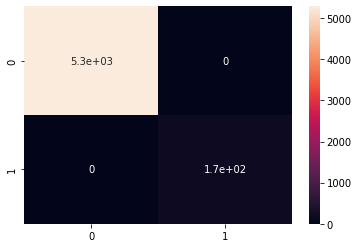

Training ROC AUC:  1.0
Training Score:  1.0
Training PR AUC:  1.0



Classification Report for Testing:

               precision    recall  f1-score   support

           0       0.97      0.97      0.97      1314
           1       0.28      0.28      0.28        50

    accuracy                           0.95      1364
   macro avg       0.63      0.63      0.63      1364
weighted avg       0.95      0.95      0.95      1364


Confusion Matrix:



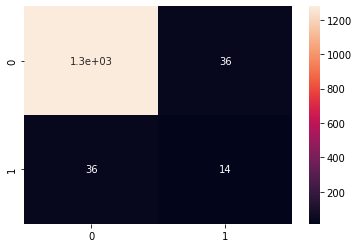

Testing ROC AUC:  0.6263013698630138
Testing Score:  0.9472140762463344
Training PR AUC:  0.10479296187683286
Finished in 0.20494580268859863 seconds


In [ ]:
# Initializes the Decision Tree classification model
model = DecisionTreeClassifier()

# Records the start time
start = time.time()

# Fits the model to the data
model.fit(K_train,trainY)

# Predicts for the training set
trainpredictions = model.predict(K_train)

# Predicts for the testing set
predictedY = model.predict(K_test)

# Records the stopping time
end = time.time()

# Prints the quality metrics for the training set
print('\nClassification Report for Training:\n\n', classification_report(trainY, trainpredictions))
print('\nConfusion Matrix:\n')
ax = sn.heatmap(confusion_matrix(trainY, trainpredictions), annot = True)
plt.show(ax)
roctrain = roc_auc_score(trainY,trainpredictions)
score_train = model.score(K_train,trainY)
y_score = model.predict_proba(K_train)[:,1]
average_precision = average_precision_score(trainY, y_score)
print('Training ROC AUC: ', roctrain)
print('Training Score: ', score_train)
print('Training PR AUC: ', average_precision)
print('\n')

# Prints the quality metrics for the testing set
print('\nClassification Report for Testing:\n\n', classification_report(testY, predictedY))
print('\nConfusion Matrix:\n')
ax = sn.heatmap(confusion_matrix(testY, predictedY), annot = True)
plt.show(ax)
roctest = roc_auc_score(testY,predictedY)
score_test = model.score(K_test,testY)
y_score = model.predict_proba(K_test)[:,1]
average_precision = average_precision_score(testY, y_score)
print('Testing ROC AUC: ', roctest)
print('Testing Score: ', score_test)
print('Training PR AUC: ', average_precision)

# Prints the runtime
print('Finished in', end - start, 'seconds')

##**K-Best Unsupervised**
For unsupervised learning we used the same scoring function and number of features as the supervised learning. Performing K-Best features for the unsupervised models resulted in Mini Batch Kmeans outperforming the other models. It appears that Kmeans classifier does the best job classifying bankruptcy while Mini Batch Kmeans is a more well rounded model. Overall we can conclude that this method does not significantly increase the effectiveness of the models.

In [ ]:
from sklearn.feature_selection import SelectKBest,chi2
K_x = X
K_y = Y
uni = SelectKBest(score_func = chi2, k = 15)
new = uni.fit_transform(K_x,K_y)

Accuracy = 0.6973163220413551


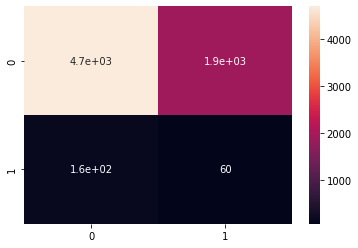

In [ ]:
#Initialize K-Best FeatureAgglomeration Model
model = FeatureAgglomeration(n_clusters=2)
fa = model.fit(new.T)
xpoints = []
ypoints = []
paint = []

total = len(K_y)
tp = fp = tn = fn = 0

#Calculate true/false positives and negatives
for i in range(len(fa.labels_)):
  if fa.labels_[i] == 0:
    if fa.labels_[i] != K_y[i]:
      fn += 1
    else:
      tn += 1
  else:
    if fa.labels_[i] != K_y[i]:
      fp += 1
    else:
      tp += 1

#Calculate Accuracy
print("Accuracy =", (tn + tp) / float(total))

#Generate Confusion Matrix
cf_matrix = [[tn, fp],[fn, tp]]
sn.heatmap(cf_matrix, annot = True)


Classification Report:

               precision    recall  f1-score   support

           0       0.96      0.30      0.46      6599
           1       0.03      0.62      0.05       220

    accuracy                           0.31      6819
   macro avg       0.49      0.46      0.26      6819
weighted avg       0.93      0.31      0.44      6819


Confusion Matrix:



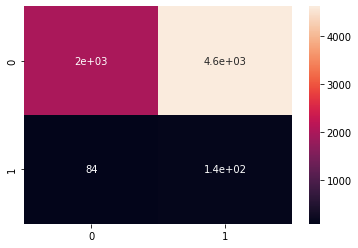

Training ROC AUC:  0.45918940886360193
Training Score:  -4.006303901260008e+23


Finished in 0.623584508895874 seconds


In [ ]:
# Initializes the KMeans Clustering class
model = KMeans(n_clusters=2, random_state = 4)

# Records the start time
start = time.time()

# Fits the model to the training data
model.fit(K_x)

# Predicts using training data
predictions = model.predict(K_x)

# Records the end time
end = time.time()

# Prints the quality metrics
print('\nClassification Report:\n\n', classification_report(K_y, predictions))
print('\nConfusion Matrix:\n')
ax = sn.heatmap(confusion_matrix(K_y, predictions), annot = True)
plt.show(ax)
roctrain = roc_auc_score(K_y,predictions)
score_train = model.score(K_x,K_y)
print('Training ROC AUC: ', roctrain)
print('Training Score: ', score_train)
print('\n')
print('Finished in', end - start, 'seconds')


Classification Report:

               precision    recall  f1-score   support

           0       0.97      0.74      0.84      6599
           1       0.04      0.33      0.07       220

    accuracy                           0.72      6819
   macro avg       0.51      0.53      0.45      6819
weighted avg       0.94      0.72      0.81      6819


Confusion Matrix:



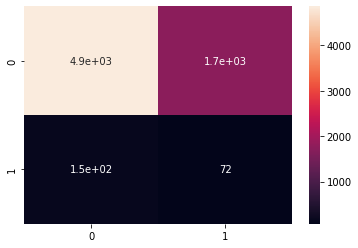

Training ROC AUC:  0.5314193610602157
Training Score:  -4.0782285622624956e+23


Finished in 0.08055686950683594 seconds


In [ ]:
# Initializes the MiniBatchKMeans Clustering class
model = MiniBatchKMeans(n_clusters=2, random_state = 4)

# Records the start time
start = time.time()

# Fits the model to the training data
model.fit(K_x)

# Predicts using training data
predictions = model.predict(K_x)

# Records the end time
end = time.time()

# Prints the quality metrics
print('\nClassification Report:\n\n', classification_report(K_y, predictions))
print('\nConfusion Matrix:\n')
ax = sn.heatmap(confusion_matrix(K_y, predictions), annot = True)
plt.show(ax)
roctrain = roc_auc_score(K_y,predictions)
score_train = model.score(K_x,K_y)
print('Training ROC AUC: ', roctrain)
print('Training Score: ', score_train)
print('\n')
print('Finished in', end - start, 'seconds')

##**Locally Linear Embeddor Supervised**
When Applied to the Supervised Models, LLE either changed nothing from the default models in the Supervised Learning section or made them somewhat worse. This could possibly be improved by adding regularization to the models. Locally Linear Embeddors are not recomended for this dataset.

In [ ]:
# Records the start time
start = time.time()

# Initializes the LLE class
embedding = LocallyLinearEmbedding(n_components=15, eigen_solver = 'dense')

# Applies LLE to dataset
LLE  = embedding.fit_transform(X)

# Records the end time
end = time.time()

# Prints the runtime
print("Time in seconds: ", (end-start))

(trainX_LLE, testX_LLE, trainY1, testY1) = train_test_split(LLE, Y, test_size=0.2, random_state=1)

Time in seconds:  46.083954095840454



Classification Report for Training:

               precision    recall  f1-score   support

           0       0.97      1.00      0.98      5285
           1       0.00      0.00      0.00       170

    accuracy                           0.97      5455
   macro avg       0.48      0.50      0.49      5455
weighted avg       0.94      0.97      0.95      5455


Confusion Matrix:



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


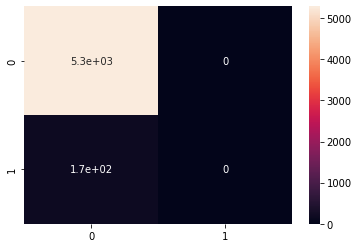

Training ROC AUC:  0.5
Training Score:  0.9688359303391384
Training PR AUC:  0.05517046851737362



Classification Report for Testing:

               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1314
           1       0.00      0.00      0.00        50

    accuracy                           0.96      1364
   macro avg       0.48      0.50      0.49      1364
weighted avg       0.93      0.96      0.95      1364


Confusion Matrix:



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


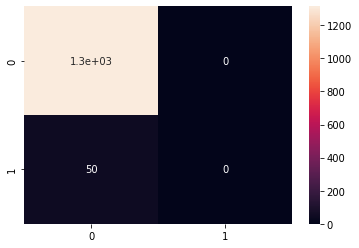

Testing ROC AUC:  0.5
Testing Score:  0.9633431085043989
Training PR AUC:  0.03639669114099239
Finished in 0.020229578018188477 seconds


In [ ]:
# Initializes the Logistic Regression classification model
model = LogisticRegression(max_iter = 10000)

# Records the start time
start = time.time()

# Fits the model to the training data
model.fit(trainX_LLE,trainY1)

# Predicts for the training set
trainpredictions = model.predict(trainX_LLE)

# Predicts for the testing set
predictedY = model.predict(testX_LLE)

# Records the end time
end = time.time()

# Prints the quality metrics for the training set
print('\nClassification Report for Training:\n\n', classification_report(trainY1, trainpredictions))
print('\nConfusion Matrix:\n')
ax = sn.heatmap(confusion_matrix(trainY1, trainpredictions), annot = True)
plt.show(ax)
roctrain = roc_auc_score(trainY1,trainpredictions)
score_train = model.score(trainX_LLE,trainY1)
y_score = model.predict_proba(trainX_LLE)[:,1]
average_precision = average_precision_score(trainY1, y_score)
print('Training ROC AUC: ', roctrain)
print('Training Score: ', score_train)
print('Training PR AUC: ', average_precision)
print('\n')

# Prints the quality metrics for the testing set
print('\nClassification Report for Testing:\n\n', classification_report(testY1, predictedY))
print('\nConfusion Matrix:\n')
ax = sn.heatmap(confusion_matrix(testY1, predictedY), annot = True)
plt.show(ax)
roctest = roc_auc_score(testY1,predictedY)
score_test = model.score(testX_LLE,testY1)
y_score = model.predict_proba(testX_LLE)[:,1]
average_precision = average_precision_score(testY1, y_score)
print('Testing ROC AUC: ', roctest)
print('Testing Score: ', score_test)
print('Training PR AUC: ', average_precision)

# Prints the runtime
print('Finished in', end - start, 'seconds')


Classification Report for Training:

               precision    recall  f1-score   support

           0       0.97      1.00      0.98      5285
           1       0.73      0.05      0.09       170

    accuracy                           0.97      5455
   macro avg       0.85      0.52      0.54      5455
weighted avg       0.96      0.97      0.96      5455


Confusion Matrix:



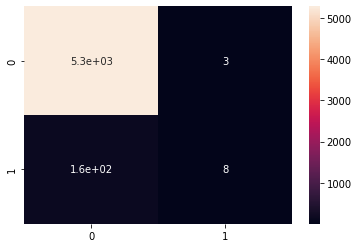

Training ROC AUC:  0.5232455896265791
Training Score:  0.9697525206232814
Training PR AUC:  0.30526590474173465



Classification Report for Testing:

               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1314
           1       0.20      0.02      0.04        50

    accuracy                           0.96      1364
   macro avg       0.58      0.51      0.51      1364
weighted avg       0.94      0.96      0.95      1364


Confusion Matrix:



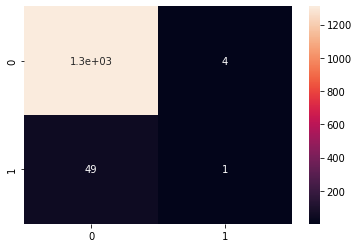

Testing ROC AUC:  0.5084779299847793
Testing Score:  0.9611436950146628
Training PR AUC:  0.06868812439153367
Finished in 0.3298630714416504 seconds


In [ ]:
# Initializes the K Nearest Neighbors classification model
model = KNeighborsClassifier()

# Records the start time
start = time.time()

# Fits the model to the training data
model.fit(trainX_LLE,trainY1)

# Predicts for the training set
trainpredictions = model.predict(trainX_LLE)

# Predicts for the testing set
predictedY = model.predict(testX_LLE)

# Records the end time
end = time.time()

# Prints the quality metrics for the training set
print('\nClassification Report for Training:\n\n', classification_report(trainY1, trainpredictions))
print('\nConfusion Matrix:\n')
ax = sn.heatmap(confusion_matrix(trainY1, trainpredictions), annot = True)
plt.show(ax)
roctrain = roc_auc_score(trainY1,trainpredictions)
score_train = model.score(trainX_LLE,trainY1)
y_score = model.predict_proba(trainX_LLE)[:,1]
average_precision = average_precision_score(trainY1, y_score)
print('Training ROC AUC: ', roctrain)
print('Training Score: ', score_train)
print('Training PR AUC: ', average_precision)
print('\n')

# Prints the quality metrics for the testing set
print('\nClassification Report for Testing:\n\n', classification_report(testY1, predictedY))
print('\nConfusion Matrix:\n')
ax = sn.heatmap(confusion_matrix(testY1, predictedY), annot = True)
plt.show(ax)
roctest = roc_auc_score(testY1,predictedY)
score_test = model.score(testX_LLE,testY1)
y_score = model.predict_proba(testX_LLE)[:,1]
average_precision = average_precision_score(testY1, y_score)
print('Testing ROC AUC: ', roctest)
print('Testing Score: ', score_test)
print('Training PR AUC: ', average_precision)

# Prints the runtime
print('Finished in', end - start, 'seconds')


Classification Report for Training:

               precision    recall  f1-score   support

           0       0.97      1.00      0.98      5285
           1       0.10      0.01      0.01       170

    accuracy                           0.97      5455
   macro avg       0.53      0.50      0.50      5455
weighted avg       0.94      0.97      0.95      5455


Confusion Matrix:



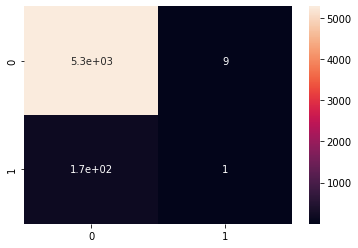

Training ROC AUC:  0.502089710056208
Training Score:  0.9673693858845096
Training PR AUC:  0.05594964283483743



Classification Report for Testing:

               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1314
           1       0.00      0.00      0.00        50

    accuracy                           0.96      1364
   macro avg       0.48      0.50      0.49      1364
weighted avg       0.93      0.96      0.94      1364


Confusion Matrix:



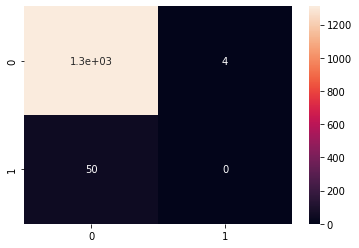

Testing ROC AUC:  0.4984779299847793
Testing Score:  0.9604105571847508
Training PR AUC:  0.03590402550955723
Finished in 0.015770435333251953 seconds


In [ ]:
# Initializes the Linear Discriminant Analysis classification model
model = LinearDiscriminantAnalysis()

# Records the start time
start = time.time()

# Fits the model to the training data
model.fit(trainX_LLE,trainY1)

# Predicts for the training set
trainpredictions = model.predict(trainX_LLE)

# Predicts for the testing set
predictedY = model.predict(testX_LLE)

# Records the end time
end = time.time()

# Prints the quality metrics for the training set
print('\nClassification Report for Training:\n\n', classification_report(trainY1, trainpredictions))
print('\nConfusion Matrix:\n')
ax = sn.heatmap(confusion_matrix(trainY1, trainpredictions), annot = True)
plt.show(ax)
roctrain = roc_auc_score(trainY1,trainpredictions)
score_train = model.score(trainX_LLE,trainY1)
y_score = model.predict_proba(trainX_LLE)[:,1]
average_precision = average_precision_score(trainY1, y_score)
print('Training ROC AUC: ', roctrain)
print('Training Score: ', score_train)
print('Training PR AUC: ', average_precision)
print('\n')

# Prints the quality metrics for the testing set
print('\nClassification Report for Testing:\n\n', classification_report(testY1, predictedY))
print('\nConfusion Matrix:\n')
ax = sn.heatmap(confusion_matrix(testY1, predictedY), annot = True)
plt.show(ax)
roctest = roc_auc_score(testY1,predictedY)
score_test = model.score(testX_LLE,testY1)
y_score = model.predict_proba(testX_LLE)[:,1]
average_precision = average_precision_score(testY1, y_score)
print('Testing ROC AUC: ', roctest)
print('Testing Score: ', score_test)
print('Training PR AUC: ', average_precision)

# Prints the runtime
print('Finished in', end - start, 'seconds')


Classification Report for Training:

               precision    recall  f1-score   support

           0       0.97      0.40      0.57      5285
           1       0.03      0.66      0.07       170

    accuracy                           0.41      5455
   macro avg       0.50      0.53      0.32      5455
weighted avg       0.94      0.41      0.55      5455


Confusion Matrix:



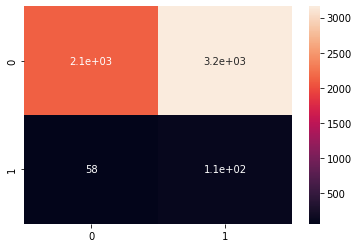

Training ROC AUC:  0.5303578384996382
Training Score:  0.4098991750687443
Training PR AUC:  0.05049166499448335



Classification Report for Testing:

               precision    recall  f1-score   support

           0       0.97      0.37      0.54      1314
           1       0.04      0.66      0.07        50

    accuracy                           0.38      1364
   macro avg       0.50      0.52      0.31      1364
weighted avg       0.93      0.38      0.52      1364


Confusion Matrix:



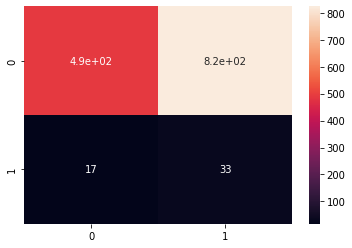

Testing ROC AUC:  0.5164535768645359
Testing Score:  0.38343108504398826
Training PR AUC:  0.04358786015225845
Finished in 0.010067462921142578 seconds


In [ ]:
# Initializes the Quadratic Discriminant Analysis classification model
model = QuadraticDiscriminantAnalysis()

# Records the start time
start = time.time()

# Fits the model to the training data
model.fit(trainX_LLE,trainY1)

# Predicts for the training set
trainpredictions = model.predict(trainX_LLE)

# Predicts for the testing set
predictedY = model.predict(testX_LLE)

# Records the end time
end = time.time()

# Prints the quality metrics for the training set
print('\nClassification Report for Training:\n\n', classification_report(trainY1, trainpredictions))
print('\nConfusion Matrix:\n')
ax = sn.heatmap(confusion_matrix(trainY1, trainpredictions), annot = True)
plt.show(ax)
roctrain = roc_auc_score(trainY1,trainpredictions)
score_train = model.score(trainX_LLE,trainY1)
y_score = model.predict_proba(trainX_LLE)[:,1]
average_precision = average_precision_score(trainY1, y_score)
print('Training ROC AUC: ', roctrain)
print('Training Score: ', score_train)
print('Training PR AUC: ', average_precision)
print('\n')

# Prints the quality metrics for the testing set
print('\nClassification Report for Testing:\n\n', classification_report(testY1, predictedY))
print('\nConfusion Matrix:\n')
ax = sn.heatmap(confusion_matrix(testY1, predictedY), annot = True)
plt.show(ax)
roctest = roc_auc_score(testY1,predictedY)
score_test = model.score(testX_LLE,testY1)
y_score = model.predict_proba(testX_LLE)[:,1]
average_precision = average_precision_score(testY1, y_score)
print('Testing ROC AUC: ', roctest)
print('Testing Score: ', score_test)
print('Training PR AUC: ', average_precision)

# Prints the runtime
print('Finished in', end - start, 'seconds')


Classification Report for Training:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5285
           1       0.99      0.94      0.96       170

    accuracy                           1.00      5455
   macro avg       0.99      0.97      0.98      5455
weighted avg       1.00      1.00      1.00      5455


Confusion Matrix:



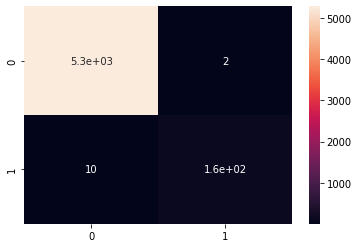

Training ROC AUC:  0.9703990205353664
Training Score:  0.9978001833180569
Training PR AUC:  0.9779114686312733



Classification Report for Testing:

               precision    recall  f1-score   support

           0       0.96      0.96      0.96      1314
           1       0.06      0.08      0.07        50

    accuracy                           0.92      1364
   macro avg       0.51      0.52      0.52      1364
weighted avg       0.93      0.92      0.93      1364


Confusion Matrix:



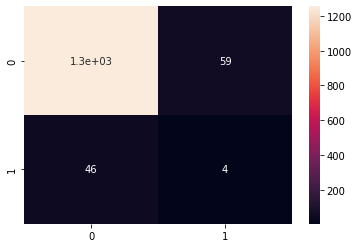

Testing ROC AUC:  0.5175494672754947
Testing Score:  0.9230205278592375
Training PR AUC:  0.0380992926483126
Finished in 0.14545798301696777 seconds


In [ ]:
# Initializes the Decision Tree classification model
model = DecisionTreeClassifier()

# Records the start time
start = time.time()

# Fits the model to the training data
model.fit(trainX_LLE,trainY1)

# Predicts for the training set
trainpredictions = model.predict(trainX_LLE)

# Predicts for the testing set
predictedY = model.predict(testX_LLE)

# Records the end time
end = time.time()

# Prints the quality metrics for the training set
print('\nClassification Report for Training:\n\n', classification_report(trainY1, trainpredictions))
print('\nConfusion Matrix:\n')
ax = sn.heatmap(confusion_matrix(trainY1, trainpredictions), annot = True)
plt.show(ax)
roctrain = roc_auc_score(trainY1,trainpredictions)
score_train = model.score(trainX_LLE,trainY1)
y_score = model.predict_proba(trainX_LLE)[:,1]
average_precision = average_precision_score(trainY1, y_score)
print('Training ROC AUC: ', roctrain)
print('Training Score: ', score_train)
print('Training PR AUC: ', average_precision)
print('\n')

# Prints the quality metrics for the testing set
print('\nClassification Report for Testing:\n\n', classification_report(testY1, predictedY))
print('\nConfusion Matrix:\n')
ax = sn.heatmap(confusion_matrix(testY1, predictedY), annot = True)
plt.show(ax)
roctest = roc_auc_score(testY1,predictedY)
score_test = model.score(testX_LLE,testY1)
y_score = model.predict_proba(testX_LLE)[:,1]
average_precision = average_precision_score(testY1, y_score)
print('Testing ROC AUC: ', roctest)
print('Testing Score: ', score_test)
print('Training PR AUC: ', average_precision)

# Prints the runtime
print('Finished in', end - start, 'seconds')

##**Locally Linear Embeddor Unsupervised**
LLE was also applied to the Unsupervised models. FeatureAgglomeration and KMeans saw a very large increase in accuracy while MiniBatchKMeans saw a large decrease. This accuracy increase is not a measure of goodness of the model however since there is a clear bias towards just predicting the larger subset (non-bankruptcy) for the FeatureAgglomeration and KMeans models. To conclude, it appears that LLE does not do a good job pulling apart the differences between the two classes.

In [ ]:
start = time.time()

# Initializes the LLE class
embedding = LocallyLinearEmbedding(n_components=15, eigen_solver = 'dense')

# Applies LLE to dataset
LLE  = embedding.fit_transform(X)

# Records the end time
end = time.time()

# Prints the runtime
print("Time in seconds: ", (end-start))

Time in seconds:  57.9135262966156


Accuracy = 0.9624578383927263


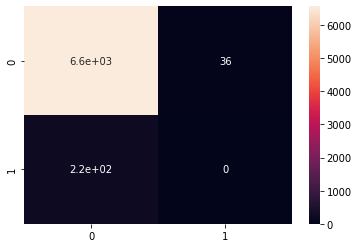

In [ ]:
#Initialize FeatureAgglomeration using LLE
model = FeatureAgglomeration(n_clusters=2)
fa = model.fit(LLE.T)
xpoints = []
ypoints = []
paint = []
total = len(Y)
tp = fp = tn = fn = 0

#Calculate true/false positives and negatives
for i in range(len(fa.labels_)):
  if fa.labels_[i] == 0:
    if fa.labels_[i] != Y[i]:
      fn += 1
    else:
      tn += 1
  else:
    if fa.labels_[i] != Y[i]:
      fp += 1
    else:
      tp += 1

#Calculate Accuracy
print("Accuracy =", (tn + tp) / float(total))

#Generate Confusion Matrix
cf_matrix = [[tn, fp],[fn, tp]]
sn.heatmap(cf_matrix, annot = True)


Classification Report:

               precision    recall  f1-score   support

           0       0.97      0.98      0.97      6599
           1       0.01      0.01      0.01       220

    accuracy                           0.95      6819
   macro avg       0.49      0.49      0.49      6819
weighted avg       0.94      0.95      0.94      6819


Confusion Matrix:



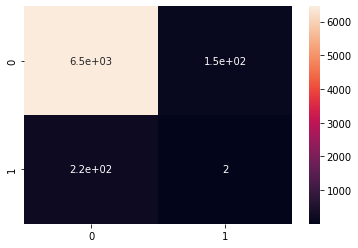

Training ROC AUC:  0.4934074033255727
Training Score:  -13.254977755157274


Finished in 0.3557615280151367 seconds


In [ ]:
# Initializes the KMeans Clustering class
model = KMeans(n_clusters=2, random_state = 4)

# Records the start time
start = time.time()

# Fits the model to the training data
model.fit(LLE)

# Predicts using training data
predictions = model.predict(LLE)

# Records the end time
end = time.time()

# Prints the quality metrics
print('\nClassification Report:\n\n', classification_report(Y, predictions))
print('\nConfusion Matrix:\n')
ax = sn.heatmap(confusion_matrix(Y, predictions), annot = True)
plt.show(ax)
roctrain = roc_auc_score(Y,predictions)
score_train = model.score(LLE,Y)
print('Training ROC AUC: ', roctrain)
print('Training Score: ', score_train)
print('\n')
print('Finished in', end - start, 'seconds')


Classification Report:

               precision    recall  f1-score   support

           0       0.96      0.12      0.21      6599
           1       0.03      0.86      0.06       220

    accuracy                           0.14      6819
   macro avg       0.50      0.49      0.14      6819
weighted avg       0.93      0.14      0.20      6819


Confusion Matrix:



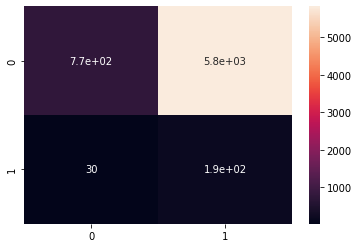

Training ROC AUC:  0.4904634310983758
Training Score:  -13.547502619229284


Finished in 0.0809783935546875 seconds


In [ ]:
# Initializes the Mini Batch KMeans Clustering class
model = MiniBatchKMeans(n_clusters=2, random_state = 4)

# Records the start time
start = time.time()

# Fits the model to the training data
model.fit(LLE)

# Predicts using training data
predictions = model.predict(LLE)

# Records the end time
end = time.time()

# Prints the quality metrics
print('\nClassification Report:\n\n', classification_report(Y, predictions))
print('\nConfusion Matrix:\n')
ax = sn.heatmap(confusion_matrix(Y, predictions), annot = True)
plt.show(ax)
roctrain = roc_auc_score(Y,predictions)
score_train = model.score(LLE,Y)
print('Training ROC AUC: ', roctrain)
print('Training Score: ', score_train)
print('\n')
print('Finished in', end - start, 'seconds')

##**Evening Data Supervised**
While evening the data lowered the accuracy metric for every model, in actuality, the models trained on the evened data did significantly better than those trained on the unevened datasets, as seen by the confusion matrices and the PR AUC score produced. The best model was the LDA followed by QDA and Decision Tree. Undersampling seems to be a good solution to alleviating bias in the models as it helps to distribute the weights of the classes better. By evening the classes we were able to reduce the amount of cluttering and allow for distinct differences between each class.


In [ ]:
# Desired number of datapoints in the class of zeros
num_zeros = 250
count = 0

# Initially creates a dataframe of all the fraud cases
test = data.iloc[np.where(test_class == 1)]

# Loops through each datapoint and appends the non fraud cases to the new dataframe
for index, i in data.iterrows():
  if i['Bankrupt?'] == 0 and count <= num_zeros:
    new_def = pd.DataFrame(i)
    new_def = new_def.transpose()
    frames = [test, new_def]
    test = pd.concat(frames)
    count+=1

# Initializes the second set of Predictors and Response
Y2 = test['Bankrupt?'].to_numpy()
X2 = test.drop(columns = 'Bankrupt?').to_numpy()


# Splits the predictors and response into testing and training sets
(trainX2, testX2, trainY2, testY2) = train_test_split(X2, Y2, test_size=0.2, random_state=1)


Classification Report for Training:

               precision    recall  f1-score   support

         0.0       0.63      0.81      0.71       197
         1.0       0.69      0.47      0.56       179

    accuracy                           0.65       376
   macro avg       0.66      0.64      0.63       376
weighted avg       0.66      0.65      0.64       376


Confusion Matrix:



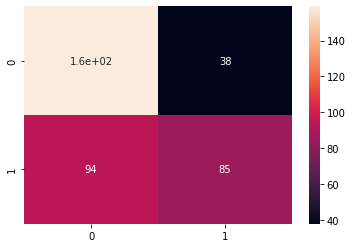

Training ROC AUC:  0.6409834670901512
Training Score:  0.648936170212766
Training PR AUC:  0.7270885980540495



Classification Report for Testing:

               precision    recall  f1-score   support

         0.0       0.63      0.87      0.73        54
         1.0       0.65      0.32      0.43        41

    accuracy                           0.63        95
   macro avg       0.64      0.59      0.58        95
weighted avg       0.64      0.63      0.60        95


Confusion Matrix:



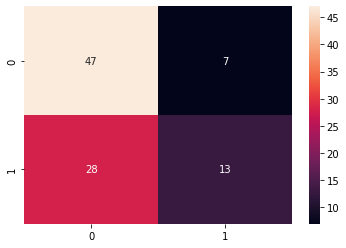

Testing ROC AUC:  0.5937217705510389
Testing Score:  0.631578947368421
Training PR AUC:  0.6666584280013245
Finished in 0.07893514633178711 seconds


In [ ]:
# Initializes the Quadratic Discriminant Analysis classification model
model = LogisticRegression(max_iter = 100000)

# Records the start time
start = time.time()

# Fits the model to the training data
model.fit(trainX2,trainY2)

# Predicts for the training set
trainpredictions = model.predict(trainX2)

# Predicts for the testing set
predictedY = model.predict(testX2)

# Records the end time
end = time.time()

# Prints the quality metrics for the training set
print('\nClassification Report for Training:\n\n', classification_report(trainY2, trainpredictions))
print('\nConfusion Matrix:\n')
ax = sn.heatmap(confusion_matrix(trainY2, trainpredictions), annot = True)
plt.show(ax)
roctrain = roc_auc_score(trainY2,trainpredictions)
score_train = model.score(trainX2,trainY2)
y_score = model.predict_proba(trainX2)[:,1]
average_precision = average_precision_score(trainY2, y_score)
print('Training ROC AUC: ', roctrain)
print('Training Score: ', score_train)
print('Training PR AUC: ', average_precision)
print('\n')

# Prints the quality metrics for the testing set
print('\nClassification Report for Testing:\n\n', classification_report(testY2, predictedY))
print('\nConfusion Matrix:\n')
ax = sn.heatmap(confusion_matrix(testY2, predictedY), annot = True)
plt.show(ax)
roctest = roc_auc_score(testY2,predictedY)
score_test = model.score(testX2,testY2)
y_score = model.predict_proba(testX2)[:,1]
average_precision = average_precision_score(testY2, y_score)
print('Testing ROC AUC: ', roctest)
print('Testing Score: ', score_test)
print('Training PR AUC: ', average_precision)

# Prints the runtime
print('Finished in', end - start, 'seconds')


Classification Report for Training:

               precision    recall  f1-score   support

         0.0       0.73      0.86      0.79       197
         1.0       0.81      0.66      0.73       179

    accuracy                           0.76       376
   macro avg       0.77      0.76      0.76       376
weighted avg       0.77      0.76      0.76       376


Confusion Matrix:



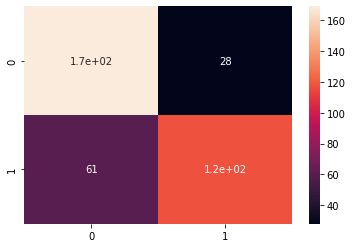

Training ROC AUC:  0.7585429486997703
Training Score:  0.7632978723404256
Training PR AUC:  0.8116963737432343



Classification Report for Testing:

               precision    recall  f1-score   support

         0.0       0.68      0.78      0.72        54
         1.0       0.64      0.51      0.57        41

    accuracy                           0.66        95
   macro avg       0.66      0.64      0.65        95
weighted avg       0.66      0.66      0.66        95


Confusion Matrix:



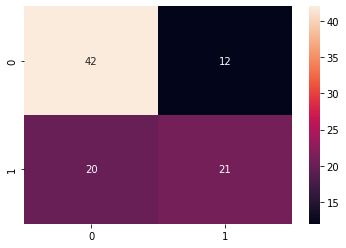

Testing ROC AUC:  0.6449864498644986
Testing Score:  0.6631578947368421
Training PR AUC:  0.6073433154949416
Finished in 0.027022838592529297 seconds


In [ ]:
# Initializes the Quadratic Discriminant Analysis classification model
model = KNeighborsClassifier()

# Records the start time
start = time.time()

# Fits the model to the training data
model.fit(trainX2,trainY2)

# Predicts for the training set
trainpredictions = model.predict(trainX2)

# Predicts for the testing set
predictedY = model.predict(testX2)

# Records the end time
end = time.time()

# Prints the quality metrics for the training set
print('\nClassification Report for Training:\n\n', classification_report(trainY2, trainpredictions))
print('\nConfusion Matrix:\n')
ax = sn.heatmap(confusion_matrix(trainY2, trainpredictions), annot = True)
plt.show(ax)
roctrain = roc_auc_score(trainY2,trainpredictions)
score_train = model.score(trainX2,trainY2)
y_score = model.predict_proba(trainX2)[:,1]
average_precision = average_precision_score(trainY2, y_score)
print('Training ROC AUC: ', roctrain)
print('Training Score: ', score_train)
print('Training PR AUC: ', average_precision)
print('\n')

# Prints the quality metrics for the testing set
print('\nClassification Report for Testing:\n\n', classification_report(testY2, predictedY))
print('\nConfusion Matrix:\n')
ax = sn.heatmap(confusion_matrix(testY2, predictedY), annot = True)
plt.show(ax)
roctest = roc_auc_score(testY2,predictedY)
score_test = model.score(testX2,testY2)
y_score = model.predict_proba(testX2)[:,1]
average_precision = average_precision_score(testY2, y_score)
print('Testing ROC AUC: ', roctest)
print('Testing Score: ', score_test)
print('Training PR AUC: ', average_precision)

# Prints the runtime
print('Finished in', end - start, 'seconds')


Classification Report for Training:

               precision    recall  f1-score   support

         0.0       0.93      0.93      0.93       197
         1.0       0.93      0.92      0.92       179

    accuracy                           0.93       376
   macro avg       0.93      0.93      0.93       376
weighted avg       0.93      0.93      0.93       376


Confusion Matrix:



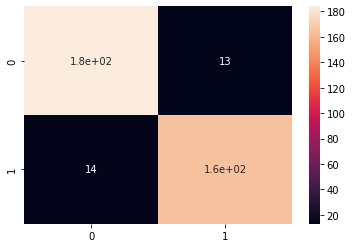

Training ROC AUC:  0.9278989308907353
Training Score:  0.9281914893617021
Training PR AUC:  0.987432580866741



Classification Report for Testing:

               precision    recall  f1-score   support

         0.0       0.82      0.93      0.87        54
         1.0       0.88      0.73      0.80        41

    accuracy                           0.84        95
   macro avg       0.85      0.83      0.83        95
weighted avg       0.85      0.84      0.84        95


Confusion Matrix:



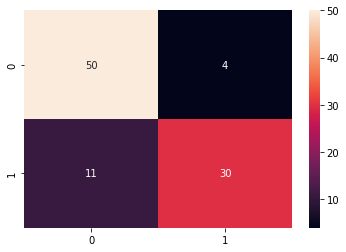

Testing ROC AUC:  0.8288166214995484
Testing Score:  0.8421052631578947
Training PR AUC:  0.8776257367452636
Finished in 0.04667806625366211 seconds


In [ ]:
# Initializes the Linear Discriminant Analysis classification model
model = LinearDiscriminantAnalysis()

# Records the start time
start = time.time()

# Fits the model to the training data
model.fit(trainX2,trainY2)

# Predicts for the training set
trainpredictions = model.predict(trainX2)

# Predicts for the testing set
predictedY = model.predict(testX2)

# Records the end time
end = time.time()

# Prints the quality metrics for the training set
print('\nClassification Report for Training:\n\n', classification_report(trainY2, trainpredictions))
print('\nConfusion Matrix:\n')
ax = sn.heatmap(confusion_matrix(trainY2, trainpredictions), annot = True)
plt.show(ax)
roctrain = roc_auc_score(trainY2,trainpredictions)
score_train = model.score(trainX2,trainY2)
y_score = model.predict_proba(trainX2)[:,1]
average_precision = average_precision_score(trainY2, y_score)
print('Training ROC AUC: ', roctrain)
print('Training Score: ', score_train)
print('Training PR AUC: ', average_precision)
print('\n')

# Prints the quality metrics for the testing set
print('\nClassification Report for Testing:\n\n', classification_report(testY2, predictedY))
print('\nConfusion Matrix:\n')
ax = sn.heatmap(confusion_matrix(testY2, predictedY), annot = True)
plt.show(ax)
roctest = roc_auc_score(testY2,predictedY)
score_test = model.score(testX2,testY2)
y_score = model.predict_proba(testX2)[:,1]
average_precision = average_precision_score(testY2, y_score)
print('Testing ROC AUC: ', roctest)
print('Testing Score: ', score_test)
print('Training PR AUC: ', average_precision)

# Prints the runtime
print('Finished in', end - start, 'seconds')


Classification Report for Training:

               precision    recall  f1-score   support

         0.0       0.80      1.00      0.89       197
         1.0       1.00      0.73      0.85       179

    accuracy                           0.87       376
   macro avg       0.90      0.87      0.87       376
weighted avg       0.90      0.87      0.87       376


Confusion Matrix:



/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


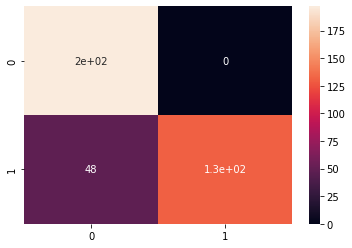

Training ROC AUC:  0.8659217877094971
Training Score:  0.8723404255319149
Training PR AUC:  0.9977628873751558



Classification Report for Testing:

               precision    recall  f1-score   support

         0.0       0.81      0.94      0.87        54
         1.0       0.91      0.71      0.79        41

    accuracy                           0.84        95
   macro avg       0.86      0.83      0.83        95
weighted avg       0.85      0.84      0.84        95


Confusion Matrix:



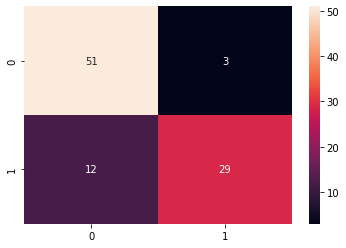

Testing ROC AUC:  0.825880758807588
Testing Score:  0.8421052631578947
Training PR AUC:  0.8534561682124282
Finished in 0.030702590942382812 seconds


In [ ]:
# Initializes the Quadratic Discriminant Analysis classification model
model = QuadraticDiscriminantAnalysis()

# Records the start time
start = time.time()

# Fits the model to the training data
model.fit(trainX2,trainY2)

# Predicts for the training set
trainpredictions = model.predict(trainX2)

# Predicts for the testing set
predictedY = model.predict(testX2)

# Records the end time
end = time.time()

# Prints the quality metrics for the training set
print('\nClassification Report for Training:\n\n', classification_report(trainY2, trainpredictions))
print('\nConfusion Matrix:\n')
ax = sn.heatmap(confusion_matrix(trainY2, trainpredictions), annot = True)
plt.show(ax)
roctrain = roc_auc_score(trainY2,trainpredictions)
score_train = model.score(trainX2,trainY2)
y_score = model.predict_proba(trainX2)[:,1]
average_precision = average_precision_score(trainY2, y_score)
print('Training ROC AUC: ', roctrain)
print('Training Score: ', score_train)
print('Training PR AUC: ', average_precision)
print('\n')

# Prints the quality metrics for the testing set
print('\nClassification Report for Testing:\n\n', classification_report(testY2, predictedY))
print('\nConfusion Matrix:\n')
ax = sn.heatmap(confusion_matrix(testY2, predictedY), annot = True)
plt.show(ax)
roctest = roc_auc_score(testY2,predictedY)
score_test = model.score(testX2,testY2)
y_score = model.predict_proba(testX2)[:,1]
average_precision = average_precision_score(testY2, y_score)
print('Testing ROC AUC: ', roctest)
print('Testing Score: ', score_test)
print('Training PR AUC: ', average_precision)

# Prints the runtime
print('Finished in', end - start, 'seconds')


Classification Report for Training:

               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       197
         1.0       1.00      1.00      1.00       179

    accuracy                           1.00       376
   macro avg       1.00      1.00      1.00       376
weighted avg       1.00      1.00      1.00       376


Confusion Matrix:



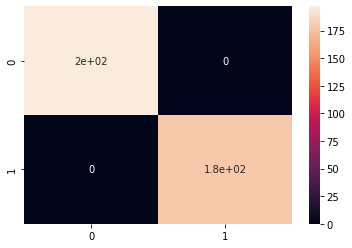

Training ROC AUC:  1.0
Training Score:  1.0
Training PR AUC:  1.0



Classification Report for Testing:

               precision    recall  f1-score   support

         0.0       0.87      0.87      0.87        54
         1.0       0.83      0.83      0.83        41

    accuracy                           0.85        95
   macro avg       0.85      0.85      0.85        95
weighted avg       0.85      0.85      0.85        95


Confusion Matrix:



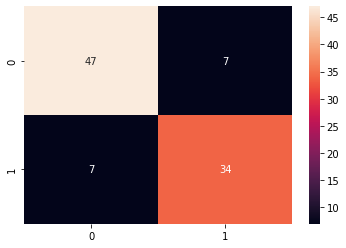

Testing ROC AUC:  0.8498193315266485
Testing Score:  0.8526315789473684
Training PR AUC:  0.7613701117755721
Finished in 0.046836137771606445 seconds


In [ ]:
# Initializes the Decision Tree classification model
model = DecisionTreeClassifier()

# Records the start time
start = time.time()

# Fits the model to the training data
model.fit(trainX2,trainY2)

# Predicts for the training set
trainpredictions = model.predict(trainX2)

# Predicts for the testing set
predictedY = model.predict(testX2)

# Records the end time
end = time.time()

# Prints the quality metrics for the training set
print('\nClassification Report for Training:\n\n', classification_report(trainY2, trainpredictions))
print('\nConfusion Matrix:\n')
ax = sn.heatmap(confusion_matrix(trainY2, trainpredictions), annot = True)
plt.show(ax)
roctrain = roc_auc_score(trainY2,trainpredictions)
score_train = model.score(trainX2,trainY2)
y_score = model.predict_proba(trainX2)[:,1]
average_precision = average_precision_score(trainY2, y_score)
print('Training ROC AUC: ', roctrain)
print('Training Score: ', score_train)
print('Training PR AUC: ', average_precision)
print('\n')

# Prints the quality metrics for the testing set
print('\nClassification Report for Testing:\n\n', classification_report(testY2, predictedY))
print('\nConfusion Matrix:\n')
ax = sn.heatmap(confusion_matrix(testY2, predictedY), annot = True)
plt.show(ax)
roctest = roc_auc_score(testY2,predictedY)
score_test = model.score(testX2,testY2)
y_score = model.predict_proba(testX2)[:,1]
average_precision = average_precision_score(testY2, y_score)
print('Testing ROC AUC: ', roctest)
print('Testing Score: ', score_test)
print('Training PR AUC: ', average_precision)

# Prints the runtime
print('Finished in', end - start, 'seconds')

##**Evening Data Unsupervised**
Undersampling the data seems to help alleviate some of the bias problem that happens in the earlier sections. The KMeans algorithm has the highest accuracy metric out of the three unsupervised models tested. The confusion matrices for the models confirm this as the KMeans model seems to have higher true positives and negatives than false ones while the FeatureAgglomeration is biased towards non-bankruptcies and MiniBatch is biased towards Bankruptcies, having double the amount of false positives than true negatives.

Accuracy = 0.4182590233545648


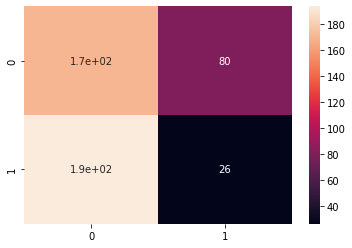

In [ ]:
#Initialize FeatureAgglomeration for Evened Data
model = FeatureAgglomeration(n_clusters=2)
fa = model.fit(X2.T)
xpoints = []
ypoints = []
paint = []

tp = fp = tn = fn = 0
total = len(Y2)

#Calculate true/false positives and negatives
for i in range(len(fa.labels_)):
  if fa.labels_[i] == 0:
    if fa.labels_[i] != Y2[i]:
      paint.append("#FF0066")
      fn += 1
    else:
      paint.append("#bbbbbb")
      tn += 1
  else:
    if fa.labels_[i] != Y2[i]:
      paint.append("#FF0066")
      fp += 1
    else:
      paint.append("#bbbbbb")
      tp += 1

#Calculate Accuracy
print("Accuracy =", (tn + tp) / float(total))

#Generate Confusion Matrix
cf_matrix = [[tn, fp],[fn, tp]]
sn.heatmap(cf_matrix, annot = True)


Classification Report:

               precision    recall  f1-score   support

         0.0       0.66      0.66      0.66       251
         1.0       0.61      0.61      0.61       220

    accuracy                           0.64       471
   macro avg       0.64      0.64      0.64       471
weighted avg       0.64      0.64      0.64       471


Confusion Matrix:



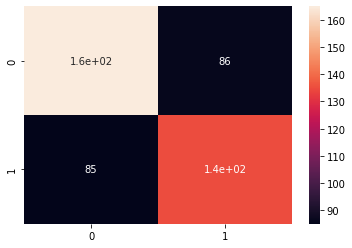

Training ROC AUC:  0.6355034407823253
Training Score:  -2.8565264572583986e+22


Finished in 0.14990234375 seconds


In [ ]:
# Initializes the KMeans Clustering class
model = KMeans(n_clusters=2, random_state = 4)

# Records the start time
start = time.time()

# Fits the model to the training data
model.fit(X2)

# Predicts using training data
predictions = model.predict(X2)

# Records the end time
end = time.time()

# Prints the quality metrics
print('\nClassification Report:\n\n', classification_report(Y2, predictions))
print('\nConfusion Matrix:\n')
ax = sn.heatmap(confusion_matrix(Y2, predictions), annot = True)
plt.show(ax)
roctrain = roc_auc_score(Y2,predictions)
score_train = model.score(X2,Y2)
print('Training ROC AUC: ', roctrain)
print('Training Score: ', score_train)
print('\n')
print('Finished in', end - start, 'seconds')


Classification Report:

               precision    recall  f1-score   support

         0.0       0.62      0.35      0.45       251
         1.0       0.50      0.75      0.60       220

    accuracy                           0.54       471
   macro avg       0.56      0.55      0.52       471
weighted avg       0.56      0.54      0.52       471


Confusion Matrix:



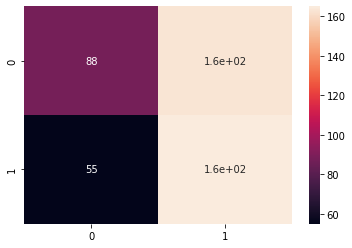

Training ROC AUC:  0.5502988047808766
Training Score:  -2.962316142287211e+22


Finished in 0.40922975540161133 seconds


In [ ]:
# Initializes the KMeans Clustering class
model = MiniBatchKMeans(n_clusters=2, random_state = 4)

# Records the start time
start = time.time()

# Fits the model to the training data
model.fit(X2)

# Predicts using training data
predictions = model.predict(X2)

# Records the end time
end = time.time()

# Prints the quality metrics
print('\nClassification Report:\n\n', classification_report(Y2, predictions))
print('\nConfusion Matrix:\n')
ax = sn.heatmap(confusion_matrix(Y2, predictions), annot = True)
plt.show(ax)
roctrain = roc_auc_score(Y2,predictions)
score_train = model.score(X2,Y2)
print('Training ROC AUC: ', roctrain)
print('Training Score: ', score_train)
print('\n')
print('Finished in', end - start, 'seconds')

##**PCA and Evening Supervised**
Using PCA on the evened data saw a decrease in effectiveness across the board compared to just evening the data. While no biases were reinforced using pca, the models just became less apt at predicting classes correctly, but this is still better than the base case. The best models were QDA, LDA, and Logistic Regression.

In [ ]:
# Performs PCA on Evened data
PCA_X = PCA(X2,.99)

# Splits Evened PCA data
(trainX, testX, trainY, testY) = train_test_split(PCA_X, Y2, test_size=0.2, random_state=1)

The original dimension of the data is 95
The new dimension of the data is 12 and it explains 0.9910697333030809 of the variance



Classification Report for Training:

               precision    recall  f1-score   support

         0.0       0.68      0.70      0.69       197
         1.0       0.66      0.64      0.65       179

    accuracy                           0.67       376
   macro avg       0.67      0.67      0.67       376
weighted avg       0.67      0.67      0.67       376


Confusion Matrix:



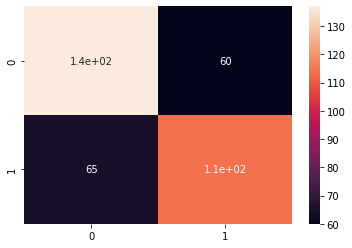

Training ROC AUC:  0.6661514902305532
Training Score:  0.6675531914893617
Training PR AUC:  0.7394595703879975



Classification Report for Testing:

               precision    recall  f1-score   support

         0.0       0.74      0.78      0.76        54
         1.0       0.68      0.63      0.66        41

    accuracy                           0.72        95
   macro avg       0.71      0.71      0.71        95
weighted avg       0.71      0.72      0.71        95


Confusion Matrix:



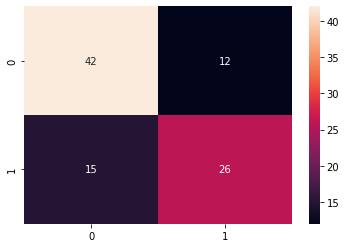

Testing ROC AUC:  0.7059620596205962
Testing Score:  0.7157894736842105
Training PR AUC:  0.737995744178459
Finished in 0.019189119338989258 seconds


In [ ]:
# Initializes the Logistic Regression classification model
model = LogisticRegression(max_iter = 10000)

# Records the start time
start = time.time()

# Fits the model to the data
model.fit(trainX,trainY)

# Predicts for the training set
trainpredictions = model.predict(trainX)

# Predicts for the testing set
predictedY = model.predict(testX)

# Records the stopping time
end = time.time()

# Prints the quality metrics for the training set
print('\nClassification Report for Training:\n\n', classification_report(trainY, trainpredictions))
print('\nConfusion Matrix:\n')
ax = sn.heatmap(confusion_matrix(trainY, trainpredictions), annot = True)
plt.show(ax)
roctrain = roc_auc_score(trainY,trainpredictions)
score_train = model.score(trainX,trainY)
y_score = model.predict_proba(trainX)[:,1]
average_precision = average_precision_score(trainY, y_score)
print('Training ROC AUC: ', roctrain)
print('Training Score: ', score_train)
print('Training PR AUC: ', average_precision)
print('\n')

# Prints the quality metrics for the testing set
print('\nClassification Report for Testing:\n\n', classification_report(testY, predictedY))
print('\nConfusion Matrix:\n')
ax = sn.heatmap(confusion_matrix(testY, predictedY), annot = True)
plt.show(ax)
roctest = roc_auc_score(testY,predictedY)
score_test = model.score(testX,testY)
y_score = model.predict_proba(testX)[:,1]
average_precision = average_precision_score(testY, y_score)
print('Testing ROC AUC: ', roctest)
print('Testing Score: ', score_test)
print('Training PR AUC: ', average_precision)

# Prints the runtime
print('Finished in', end - start, 'seconds')


Classification Report for Training:

               precision    recall  f1-score   support

         0.0       0.73      0.87      0.80       197
         1.0       0.82      0.65      0.73       179

    accuracy                           0.77       376
   macro avg       0.78      0.76      0.76       376
weighted avg       0.78      0.77      0.76       376


Confusion Matrix:



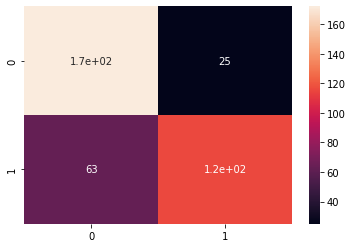

Training ROC AUC:  0.7605705697189689
Training Score:  0.7659574468085106
Training PR AUC:  0.8167044650430668



Classification Report for Testing:

               precision    recall  f1-score   support

         0.0       0.69      0.80      0.74        54
         1.0       0.67      0.54      0.59        41

    accuracy                           0.68        95
   macro avg       0.68      0.67      0.67        95
weighted avg       0.68      0.68      0.68        95


Confusion Matrix:



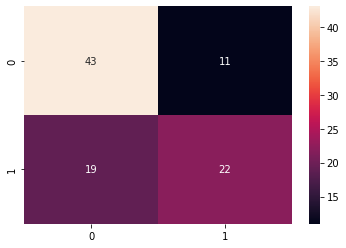

Testing ROC AUC:  0.6664408310749774
Testing Score:  0.6842105263157895
Training PR AUC:  0.6139442278990499
Finished in 0.020792722702026367 seconds


In [ ]:
# Initializes the K Nearest Neighbors classification model
model = KNeighborsClassifier()

# Records the start time
start = time.time()

# Fits the model to the data
model.fit(trainX,trainY)

# Predicts for the training set
trainpredictions = model.predict(trainX)

# Predicts for the testing set
predictedY = model.predict(testX)

# Records the stopping time
end = time.time()

# Prints the quality metrics for the training set
print('\nClassification Report for Training:\n\n', classification_report(trainY, trainpredictions))
print('\nConfusion Matrix:\n')
ax = sn.heatmap(confusion_matrix(trainY, trainpredictions), annot = True)
plt.show(ax)
roctrain = roc_auc_score(trainY,trainpredictions)
score_train = model.score(trainX,trainY)
y_score = model.predict_proba(trainX)[:,1]
average_precision = average_precision_score(trainY, y_score)
print('Training ROC AUC: ', roctrain)
print('Training Score: ', score_train)
print('Training PR AUC: ', average_precision)
print('\n')

# Prints the quality metrics for the testing set
print('\nClassification Report for Testing:\n\n', classification_report(testY, predictedY))
print('\nConfusion Matrix:\n')
ax = sn.heatmap(confusion_matrix(testY, predictedY), annot = True)
plt.show(ax)
roctest = roc_auc_score(testY,predictedY)
score_test = model.score(testX,testY)
y_score = model.predict_proba(testX)[:,1]
average_precision = average_precision_score(testY, y_score)
print('Testing ROC AUC: ', roctest)
print('Testing Score: ', score_test)
print('Training PR AUC: ', average_precision)

# Prints the runtime
print('Finished in', end - start, 'seconds')


Classification Report for Training:

               precision    recall  f1-score   support

         0.0       0.67      0.70      0.69       197
         1.0       0.65      0.63      0.64       179

    accuracy                           0.66       376
   macro avg       0.66      0.66      0.66       376
weighted avg       0.66      0.66      0.66       376


Confusion Matrix:



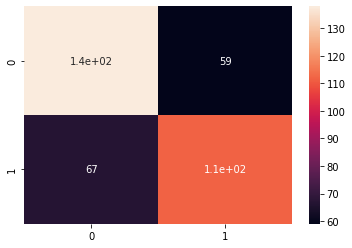

Training ROC AUC:  0.6631029691177722
Training Score:  0.6648936170212766
Training PR AUC:  0.7404396269822228



Classification Report for Testing:

               precision    recall  f1-score   support

         0.0       0.73      0.76      0.75        54
         1.0       0.67      0.63      0.65        41

    accuracy                           0.71        95
   macro avg       0.70      0.70      0.70        95
weighted avg       0.70      0.71      0.70        95


Confusion Matrix:



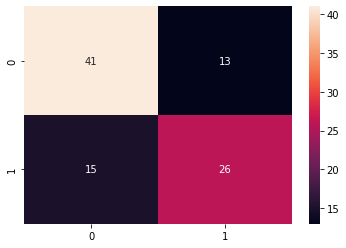

Testing ROC AUC:  0.696702800361337
Testing Score:  0.7052631578947368
Training PR AUC:  0.7303246984702794
Finished in 0.025218963623046875 seconds


In [ ]:
# Initializes the Linear Discriminant Analysis classification model
model = LinearDiscriminantAnalysis()

# Records the start time
start = time.time()

# Fits the model to the data
model.fit(trainX,trainY)

# Predicts for the training set
trainpredictions = model.predict(trainX)

# Predicts for the testing set
predictedY = model.predict(testX)

# Records the stopping time
end = time.time()

# Prints the quality metrics for the training set
print('\nClassification Report for Training:\n\n', classification_report(trainY, trainpredictions))
print('\nConfusion Matrix:\n')
ax = sn.heatmap(confusion_matrix(trainY, trainpredictions), annot = True)
plt.show(ax)
roctrain = roc_auc_score(trainY,trainpredictions)
score_train = model.score(trainX,trainY)
y_score = model.predict_proba(trainX)[:,1]
average_precision = average_precision_score(trainY, y_score)
print('Training ROC AUC: ', roctrain)
print('Training Score: ', score_train)
print('Training PR AUC: ', average_precision)
print('\n')

# Prints the quality metrics for the testing set
print('\nClassification Report for Testing:\n\n', classification_report(testY, predictedY))
print('\nConfusion Matrix:\n')
ax = sn.heatmap(confusion_matrix(testY, predictedY), annot = True)
plt.show(ax)
roctest = roc_auc_score(testY,predictedY)
score_test = model.score(testX,testY)
y_score = model.predict_proba(testX)[:,1]
average_precision = average_precision_score(testY, y_score)
print('Testing ROC AUC: ', roctest)
print('Testing Score: ', score_test)
print('Training PR AUC: ', average_precision)

# Prints the runtime
print('Finished in', end - start, 'seconds')


Classification Report for Training:

               precision    recall  f1-score   support

         0.0       0.54      0.99      0.70       197
         1.0       0.86      0.07      0.12       179

    accuracy                           0.55       376
   macro avg       0.70      0.53      0.41       376
weighted avg       0.69      0.55      0.42       376


Confusion Matrix:



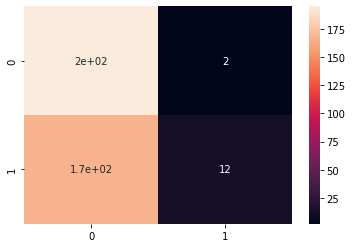

Training ROC AUC:  0.528443410940646
Training Score:  0.550531914893617
Training PR AUC:  0.7134411563842271



Classification Report for Testing:

               precision    recall  f1-score   support

         0.0       0.57      1.00      0.73        54
         1.0       1.00      0.02      0.05        41

    accuracy                           0.58        95
   macro avg       0.79      0.51      0.39        95
weighted avg       0.76      0.58      0.44        95


Confusion Matrix:



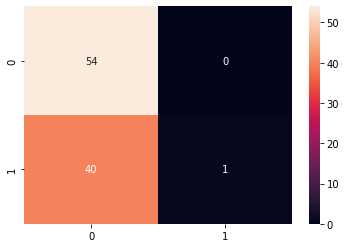

Testing ROC AUC:  0.5121951219512195
Testing Score:  0.5789473684210527
Training PR AUC:  0.756395287318653
Finished in 0.011011362075805664 seconds


In [ ]:
# Initializes the Quadratic Discriminant Analysis classification model
model = QuadraticDiscriminantAnalysis()

# Records the start time
start = time.time()

# Fits the model to the data
model.fit(trainX,trainY)

# Predicts for the training set
trainpredictions = model.predict(trainX)

# Predicts for the testing set
predictedY = model.predict(testX)

# Records the stopping time
end = time.time()

# Prints the quality metrics for the training set
print('\nClassification Report for Training:\n\n', classification_report(trainY, trainpredictions))
print('\nConfusion Matrix:\n')
ax = sn.heatmap(confusion_matrix(trainY, trainpredictions), annot = True)
plt.show(ax)
roctrain = roc_auc_score(trainY,trainpredictions)
score_train = model.score(trainX,trainY)
y_score = model.predict_proba(trainX)[:,1]
average_precision = average_precision_score(trainY, y_score)
print('Training ROC AUC: ', roctrain)
print('Training Score: ', score_train)
print('Training PR AUC: ', average_precision)
print('\n')

# Prints the quality metrics for the testing set
print('\nClassification Report for Testing:\n\n', classification_report(testY, predictedY))
print('\nConfusion Matrix:\n')
ax = sn.heatmap(confusion_matrix(testY, predictedY), annot = True)
plt.show(ax)
roctest = roc_auc_score(testY,predictedY)
score_test = model.score(testX,testY)
y_score = model.predict_proba(testX)[:,1]
average_precision = average_precision_score(testY, y_score)
print('Testing ROC AUC: ', roctest)
print('Testing Score: ', score_test)
print('Training PR AUC: ', average_precision)

# Prints the runtime
print('Finished in', end - start, 'seconds')


Classification Report for Training:

               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       197
         1.0       1.00      1.00      1.00       179

    accuracy                           1.00       376
   macro avg       1.00      1.00      1.00       376
weighted avg       1.00      1.00      1.00       376


Confusion Matrix:



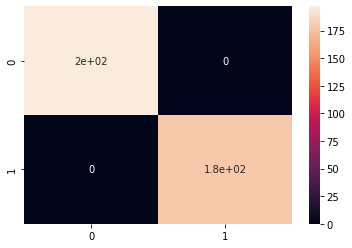

Training ROC AUC:  1.0
Training Score:  1.0
Training PR AUC:  1.0



Classification Report for Testing:

               precision    recall  f1-score   support

         0.0       0.64      0.59      0.62        54
         1.0       0.51      0.56      0.53        41

    accuracy                           0.58        95
   macro avg       0.58      0.58      0.58        95
weighted avg       0.58      0.58      0.58        95


Confusion Matrix:



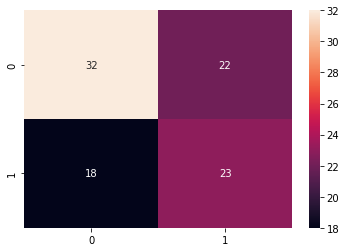

Testing ROC AUC:  0.5767841011743451
Testing Score:  0.5789473684210527
Training PR AUC:  0.47619455141919836
Finished in 0.006229400634765625 seconds


In [ ]:
# Initializes the Decision Tree classification model
model = DecisionTreeClassifier()

# Records the start time
start = time.time()

# Fits the model to the data
model.fit(trainX,trainY)

# Predicts for the training set
trainpredictions = model.predict(trainX)

# Predicts for the testing set
predictedY = model.predict(testX)

# Records the stopping time
end = time.time()

# Prints the quality metrics for the training set
print('\nClassification Report for Training:\n\n', classification_report(trainY, trainpredictions))
print('\nConfusion Matrix:\n')
ax = sn.heatmap(confusion_matrix(trainY, trainpredictions), annot = True)
plt.show(ax)
roctrain = roc_auc_score(trainY,trainpredictions)
score_train = model.score(trainX,trainY)
y_score = model.predict_proba(trainX)[:,1]
average_precision = average_precision_score(trainY, y_score)
print('Training ROC AUC: ', roctrain)
print('Training Score: ', score_train)
print('Training PR AUC: ', average_precision)
print('\n')

# Prints the quality metrics for the testing set
print('\nClassification Report for Testing:\n\n', classification_report(testY, predictedY))
print('\nConfusion Matrix:\n')
ax = sn.heatmap(confusion_matrix(testY, predictedY), annot = True)
plt.show(ax)
roctest = roc_auc_score(testY,predictedY)
score_test = model.score(testX,testY)
y_score = model.predict_proba(testX)[:,1]
average_precision = average_precision_score(testY, y_score)
print('Testing ROC AUC: ', roctest)
print('Testing Score: ', score_test)
print('Training PR AUC: ', average_precision)

# Prints the runtime
print('Finished in', end - start, 'seconds')

##**PCA and Evening Unsupervised**
Performing PCA on unsupervised evened models resulted in an increase in accuracy for FeatureAgglomeration while increasing the number of correctly classified bankrupt cases. PCA and evening the data did not have much of an effect on the evened Kmeans and Mini Batch Kmeans. By comparing confusion matrices, our results suggest that Kmeans and FeatureAgglomeration are pretty similar in how they perform but outperform MiniBatchKmeans which stull shows bias towards predicting Bankruptcies.

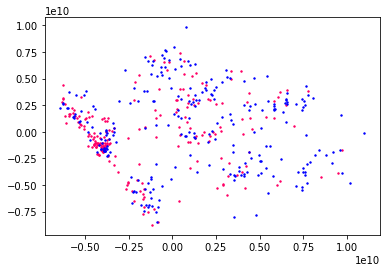

In [ ]:
#Use sklearn pca to condense data to 2 dimensions
pca = PC(n_components=2)
pcaX2 = pca.fit_transform(X2)
xpoints = []
ypoints = []
paint = []

#Assign colors for bankruptcies and non-bankruptcies
for i in range(len(Y2)):
  if Y2[i] == 0:
    paint.append("#0000FF")
  else:
    paint.append("#FF0066")

#Plot Data
for i in range(len(pcaX2)):
  plt.scatter(pcaX2[i][0], pcaX2[i][1], s = 2, color=paint[i])
plt.show()

Accuracy = 0.42038216560509556


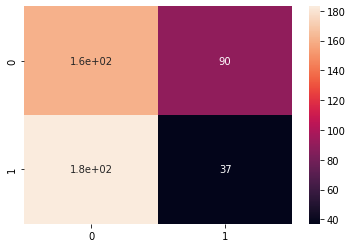

In [ ]:
#Initialize Evened and PCA Feature Agglomeration
model = FeatureAgglomeration(n_clusters=2)
fa = model.fit(pcaX2.T)

xpoints = []
ypoints = []
paint = []
tp = fp = tn = fn = 0
total = len(Y2)

#Calculate true/false positives and negatives
for i in range(len(fa.labels_)):
  if fa.labels_[i] == 0:
    if fa.labels_[i] != Y2[i]:
      paint.append("#FF0066")
      fn += 1
    else:
      paint.append("#bbbbbb")
      tn += 1
  else:
    if fa.labels_[i] != Y2[i]:
      paint.append("#FF0066")
      fp += 1
    else:
      paint.append("#bbbbbb")
      tp += 1

#Calculate Accuracy
print("Accuracy =", (tn+tp)/float(total))
#Generate Confusion Matrix
cf_matrix = [[tn, fp],[fn, tp]]
sn.heatmap(cf_matrix, annot = True)

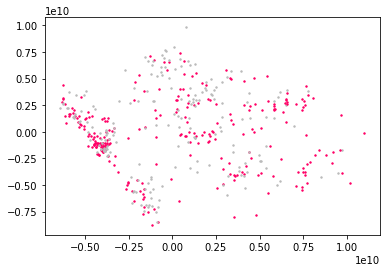

In [ ]:
#Plot Data
for i in range(len(pcaX2)):
  plt.scatter(pcaX2[i][0], pcaX2[i][1], s = 2, color=paint[i])
plt.show()

The original dimension of the data is 95
The new dimension of the data is 7 and it explains 0.9226837031886906 of the variance

Classification Report:

               precision    recall  f1-score   support

         0.0       0.66      0.66      0.66       251
         1.0       0.61      0.61      0.61       220

    accuracy                           0.64       471
   macro avg       0.64      0.64      0.64       471
weighted avg       0.64      0.64      0.64       471


Confusion Matrix:



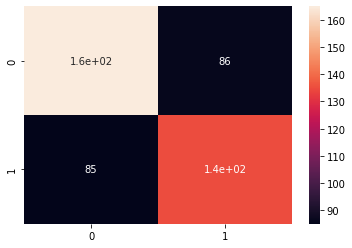

Training ROC AUC:  0.6355034407823253
Training Score:  -2.5859462855003143e+22


Finished in 0.45247578620910645 seconds


In [ ]:
# Initializes the KMeans Clustering class
model = KMeans(n_clusters=2, random_state = 4)

X3 = PCA(X2,0.90)

# Records the start time
start = time.time()

# Fits the model to the training data
model.fit(X3)

# Predicts using training data
predictions = model.predict(X3)

# Records the end time
end = time.time()

# Prints the quality metrics
print('\nClassification Report:\n\n', classification_report(Y2, predictions))
print('\nConfusion Matrix:\n')
ax = sn.heatmap(confusion_matrix(Y2, predictions), annot = True)
plt.show(ax)
roctrain = roc_auc_score(Y2,predictions)
score_train = model.score(X3,Y2)
print('Training ROC AUC: ', roctrain)
print('Training Score: ', score_train)
print('\n')
print('Finished in', end - start, 'seconds')

The original dimension of the data is 95
The new dimension of the data is 12 and it explains 0.9910697333030805 of the variance

Classification Report:

               precision    recall  f1-score   support

         0.0       0.62      0.35      0.45       251
         1.0       0.50      0.75      0.60       220

    accuracy                           0.54       471
   macro avg       0.56      0.55      0.52       471
weighted avg       0.56      0.54      0.52       471


Confusion Matrix:



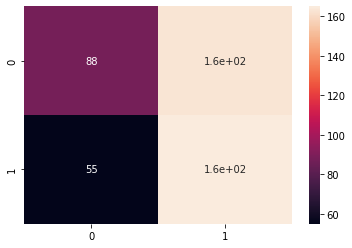

Training ROC AUC:  0.5502988047808766
Training Score:  -2.9326185967406304e+22


Finished in 0.12122702598571777 seconds


In [ ]:
# Initializes the MiniBatchKMeans Clustering class
model = MiniBatchKMeans(n_clusters=2, random_state = 4)

X3 = PCA(X2,0.99)

# Records the start time
start = time.time()

# Fits the model to the training data
model.fit(X3)

# Predicts using training data
predictions = model.predict(X3)

# Records the end time
end = time.time()

# Prints the quality metrics
print('\nClassification Report:\n\n', classification_report(Y2, predictions))
print('\nConfusion Matrix:\n')
ax = sn.heatmap(confusion_matrix(Y2, predictions), annot = True)
plt.show(ax)
roctrain = roc_auc_score(Y2,predictions)
score_train = model.score(X3,Y2)
print('Training ROC AUC: ', roctrain)
print('Training Score: ', score_train)
print('\n')
print('Finished in', end - start, 'seconds')


Classification Report:

               precision    recall  f1-score   support

         0.0       0.68      0.45      0.54       251
         1.0       0.55      0.75      0.63       220

    accuracy                           0.59       471
   macro avg       0.61      0.60      0.59       471
weighted avg       0.62      0.59      0.58       471


Confusion Matrix:



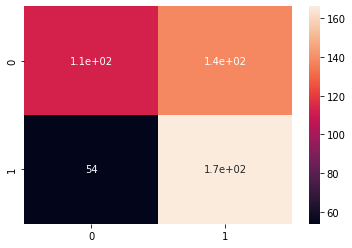

Training ROC AUC:  0.6023723288663527
Training Score:  -8.341829061876997e+21


Finished in 0.13635635375976562 seconds


In [ ]:
# Initializes the MiniBatchKMeans Clustering class
model = MiniBatchKMeans(n_clusters=2, random_state = 4)

# Records the start time
start = time.time()

# Fits the model to the training data
model.fit(pcaX2)

# Predicts using training data
predictions = model.predict(pcaX2)

# Records the end time
end = time.time()

# Prints the quality metrics
print('\nClassification Report:\n\n', classification_report(Y2, predictions))
print('\nConfusion Matrix:\n')
ax = sn.heatmap(confusion_matrix(Y2, predictions), annot = True)
plt.show(ax)
roctrain = roc_auc_score(Y2,predictions)
score_train = model.score(pcaX2,Y2)
print('Training ROC AUC: ', roctrain)
print('Training Score: ', score_train)
print('\n')
print('Finished in', end - start, 'seconds')

##**Conclusion**
We can conclude that Supervised Learning tends to generate more effective models than Unsupervised Learning. This is as expected because in supervised learning we train the model with the correct answers so it can make direct connections between the two classes while unsupervised learning bases its outcome purely on the orientation of the predictors. We also see that undersampling is an extremely effective approach to heavily imbalanced data because it allows for the opportunity to seperate the two classes by elievating some of the points in the class with more occurences. This method has proved to be extremely effective yet unsupervised learning still lacks behind supervised learning.